## Import the image and read the values.

In [1]:
# imports
from PIL import Image
import numpy as np

In [2]:
img = Image.open("video-example.gif")
type(img)

PIL.GifImagePlugin.GifImageFile

In [3]:
print("Format:", img.format, "\nWidth:", img.width, "\nHeight:", img.height, "\nMode:", img.mode)

Format: GIF 
Width: 360 
Height: 240 
Mode: P


This means that the image is "*palletised*" meaning it stores 256 unique colors. **All GIF images are always palletised.**

To obtain the RBG values we can use convert.

In [4]:
rgb_image = img.convert("RGB")
rgb_image.mode

'RGB'

This sets each pixel to be defined in three different *bands* (color scheme). Previously it was defined according to one color mode. Now, each pixel is defined using three bands ('R', 'G', 'B').

In [5]:
rgb_image.getbands()

('R', 'G', 'B')

We can see this if we obtain the first pixel in the image and see the type.

In [6]:
rgb_image.getpixel((rgb_image.width/2, rgb_image.height/2))

(255, 93, 0)

In [7]:
rgb_image.show()

A pixel with the values (0, 0, 0) means it has 0 red values, 0 green value, and 0 blue values. This is a black pixel.

Summary of the image data:

In [8]:
print("Format:", rgb_image.format, "\nWidth:", rgb_image.width, "\nHeight:", rgb_image.height, "\nMode:", rgb_image.mode)

Format: None 
Width: 360 
Height: 240 
Mode: RGB


## Preprocessing: Cropping the image

Because the image contains a black sidebars from the recording, we are going to crop them out, so we can only use the important pixels.

In [9]:
def crop_image(rgb_image):
    # Define the boundary to crop
    x1 = 0 # Left coordinate of the crop rectangle
    x2 = 0 # Right coordinate of the crop rectangle
    # y1 = 0 # Top coordiante of the crop rectangle
    # y2 = 0 # Bottom coordinate of the crop 

    # Loop through the x-axis until color is found
    for i in range (rgb_image.width):
        r, g, b = rgb_image.getpixel((i, 0))
        if r != 0 or g != 0 or b != 0:
            x1 = i
            break

    # Loop through the x-axis until color is no longer found
    for i in range (x1, rgb_image.width):
        r, g, b = rgb_image.getpixel((i, 0))
        if r == 0 and g == 0 and b == 0:
            x2 = i - 1
            break
    
    return rgb_image.crop((x1, 0, x2, rgb_image.height))    

In [10]:
cropped_image = crop_image(rgb_image)
cropped_image.show()

Get the numpy array from image

In [11]:
im_array = np.array(cropped_image)
im_array[..., 0].mean()

251.85176399026764

Creating a signal extractor

In [12]:
import cv2
from sklearn.decomposition import FastICA, PCA

class SignalExtractor():
    def __init__(self, sample_rate):
        self.sample_rate = sample_rate
        pass

    def red_channel_mean(self, frames, **kwargs):
        signal = []
        for frame in frames:
            mean_r_ch = frame[..., 0].mean()
            signal.append(mean_r_ch)
        return signal
    
    def green_channel_mean(self, frames, **kwargs):
        signal = []
        for frame in frames:
            mean_g_ch = frame[..., 1].mean()
            signal.append(mean_g_ch)
        return signal

    def luma_component_mean(self, frames):
        signal = []
        for frame_bgr in frames:
            img_ycrcb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2YCrCb)
            mean_of_luma = img_ycrcb[..., 0].mean()
            signal.append(mean_of_luma)

        return np.array(signal)

In [13]:
frames = np.array([im_array])

In [14]:
frames.shape

(1, 240, 137, 3)

In [15]:
se = SignalExtractor(sample_rate=100)
se.red_channel_mean(frames=frames)

[251.85176399026764]

note: buat list/array frame dari gambar gif dan ubah menjadi nd arrray

#Convert GIF into array of frame

In [17]:
def gif_to_frames(inputgif):
    gif = Image.open(inputgif)
    frames = []
    
    try:
        while True:
            frame = gif.copy()
            frames.append(np.array(frame))
            gif.seek(len(frames))
    except EOFError:
        pass
        
    return frames
    
inputgif = "video-example.gif"
frames = gif_to_frames(inputgif)

In [18]:
for i, frame in enumerate(frames):
    print(f"Frame {i + 1}")
    print(frame)
          

Frame 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Frame 2
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
Frame 3
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 2

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  1   0   0 255]
  [  1   0   0 255]
  [  1   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  1   0   0 255]
  [  1   0   0 255]
  [  1   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  1   0   0 255]
  [  1   0   0 255]
  [  1   0   0 255]]]
Frame 198
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  

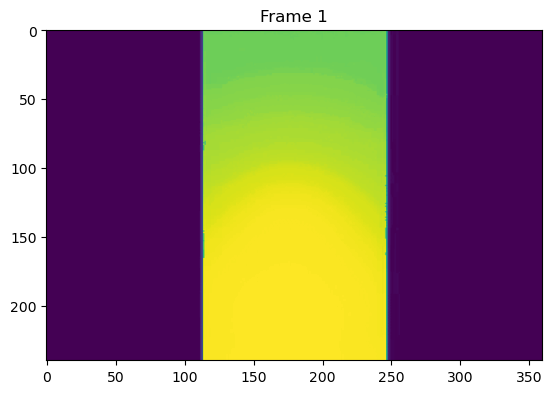

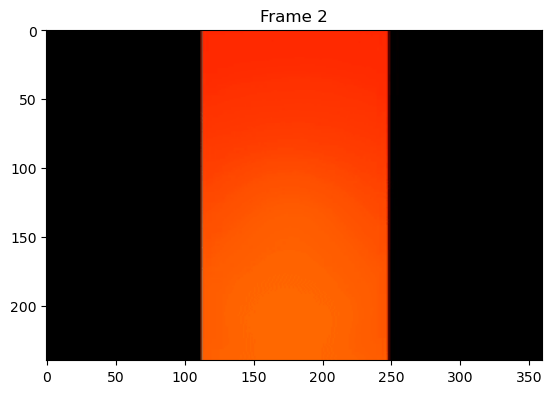

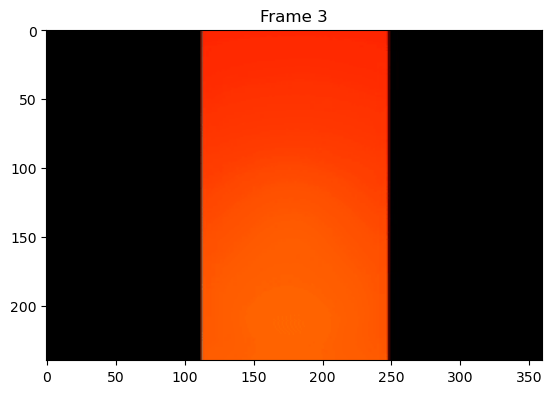

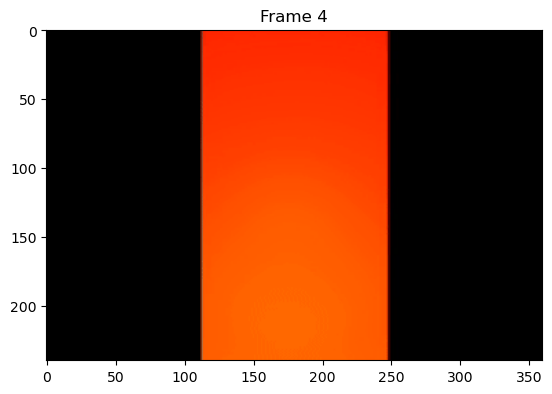

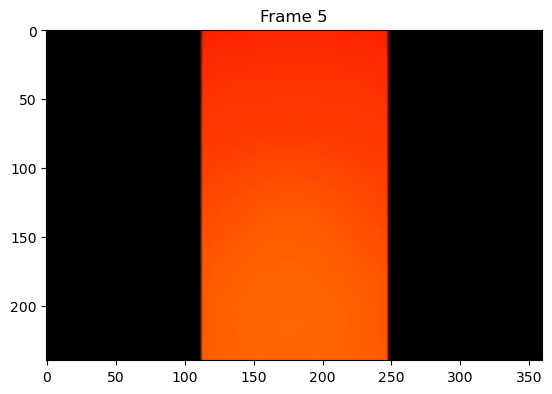

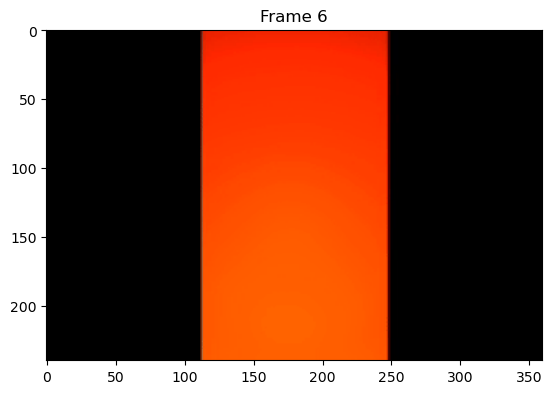

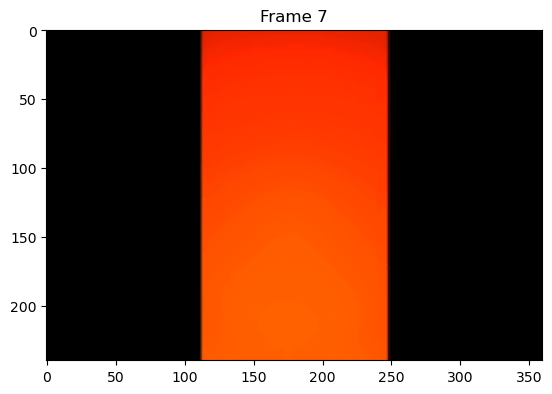

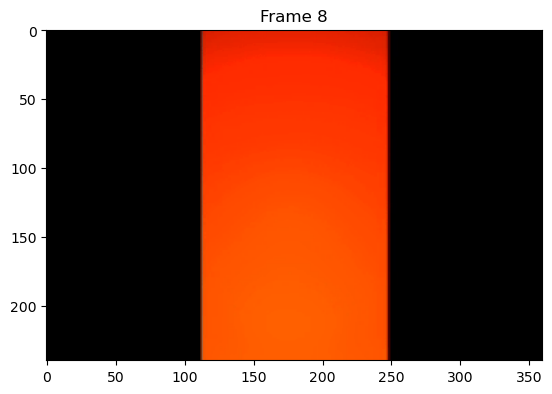

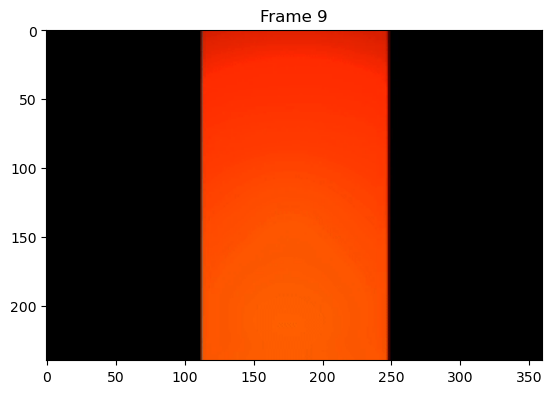

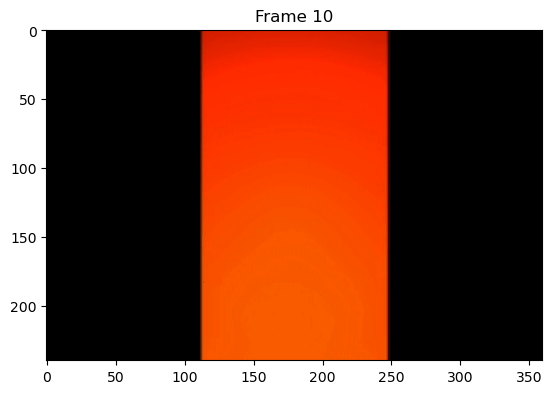

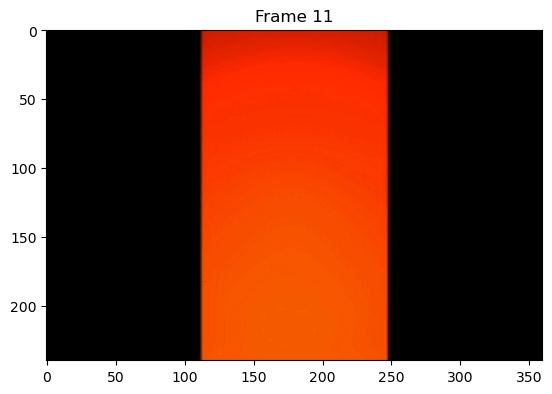

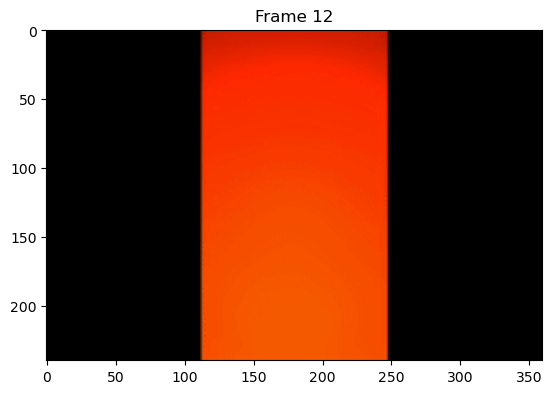

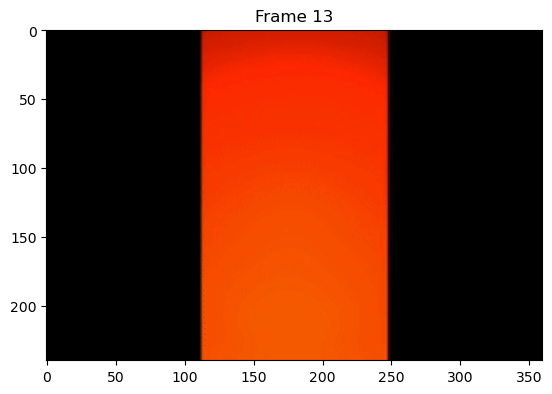

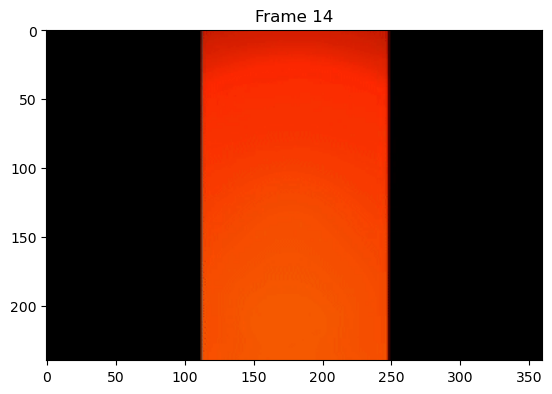

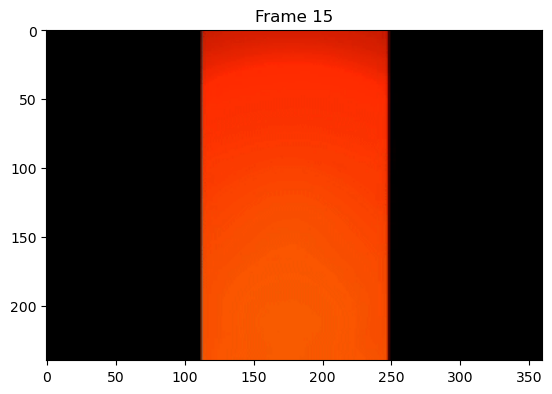

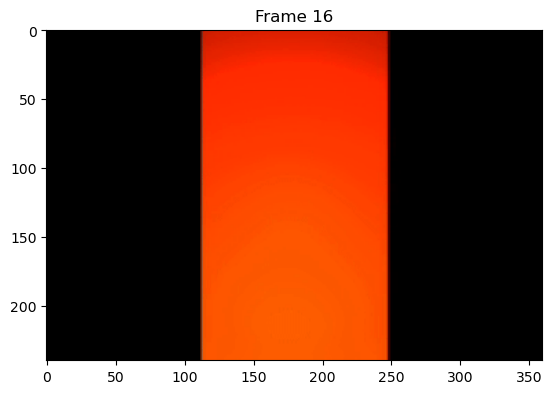

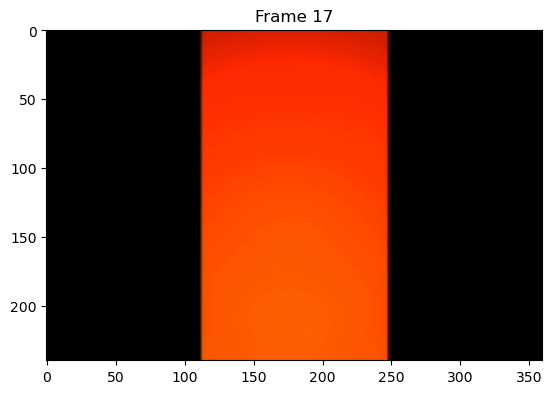

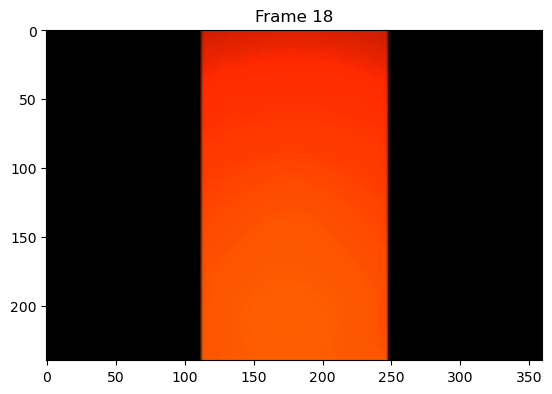

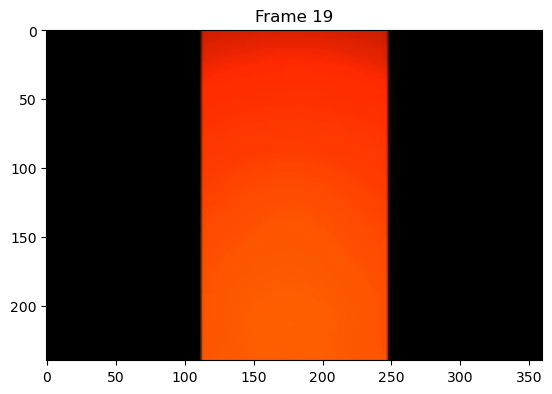

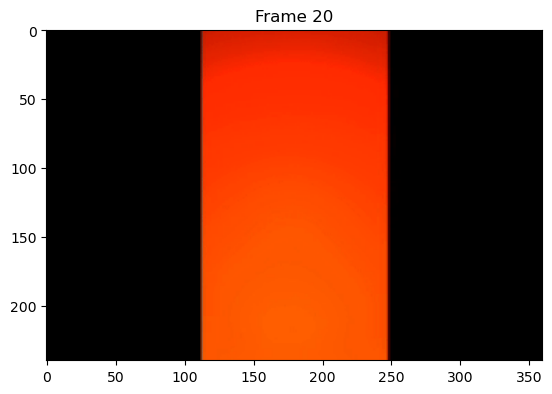

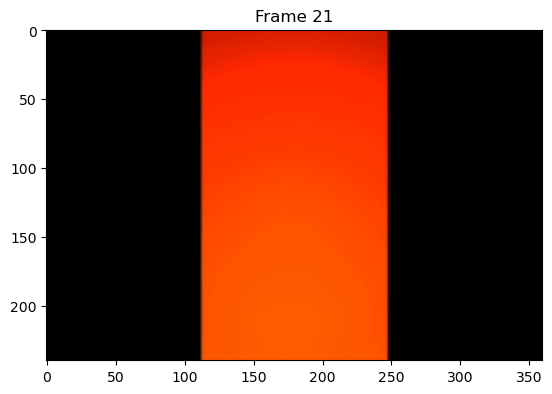

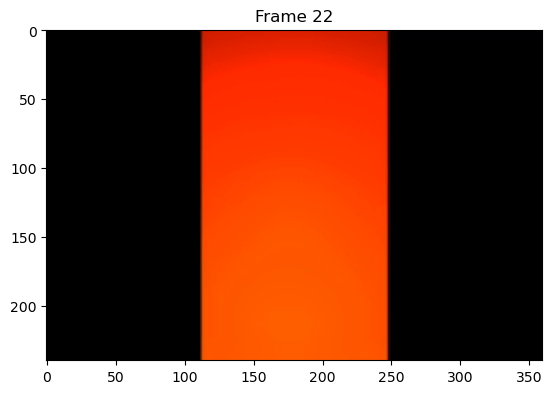

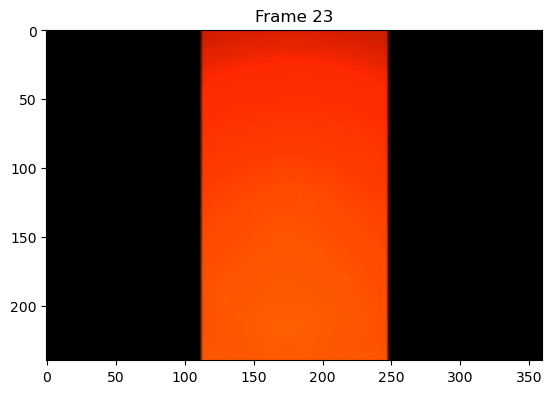

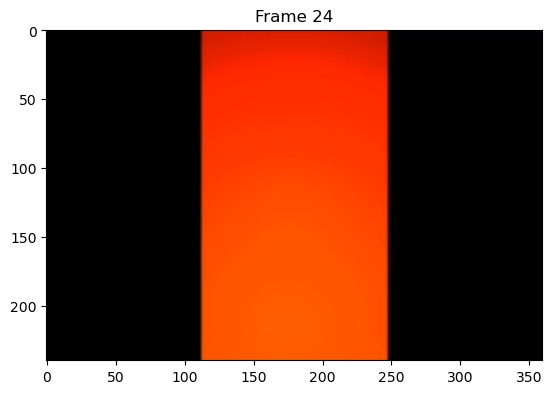

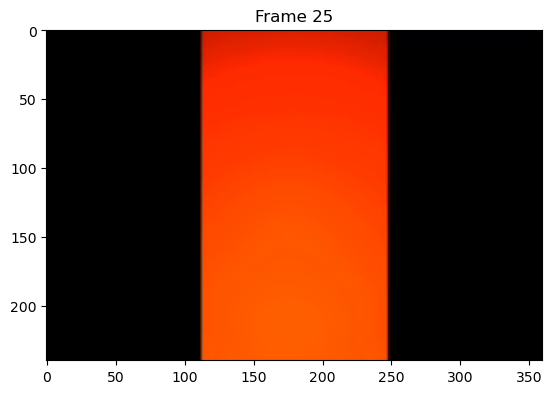

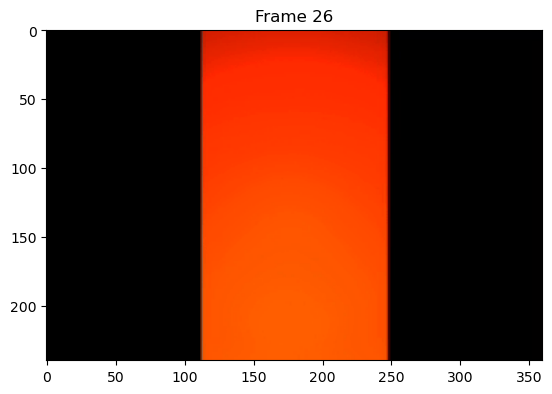

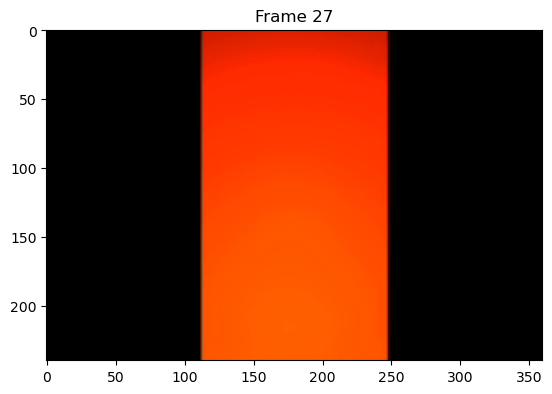

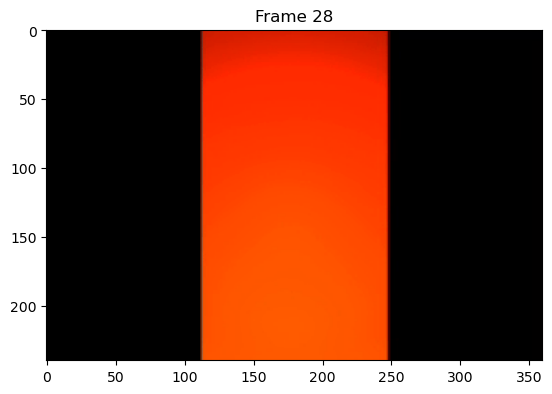

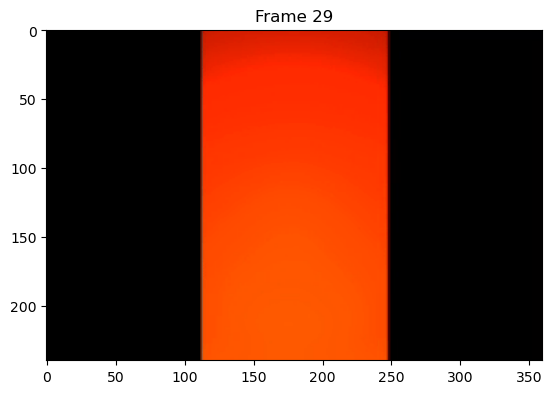

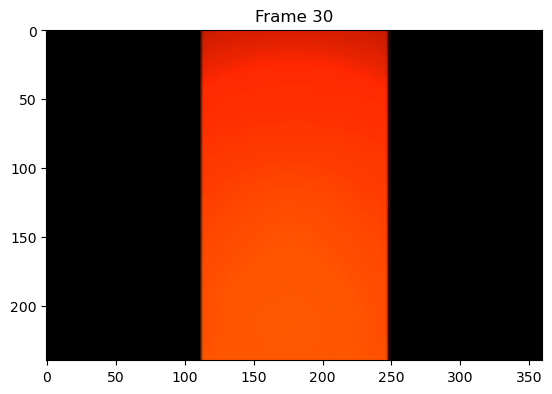

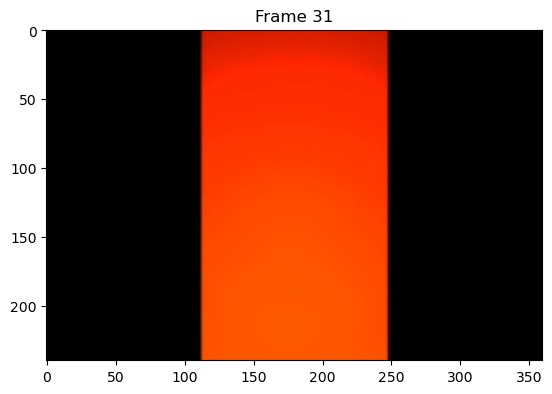

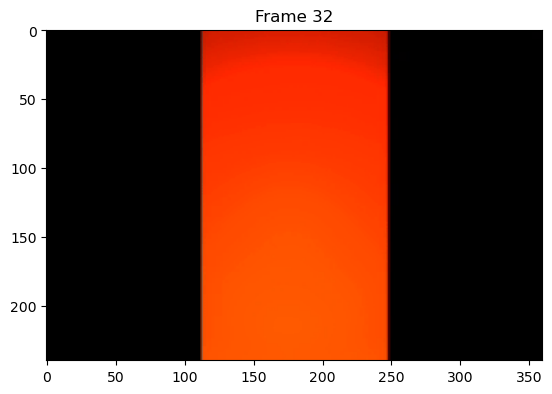

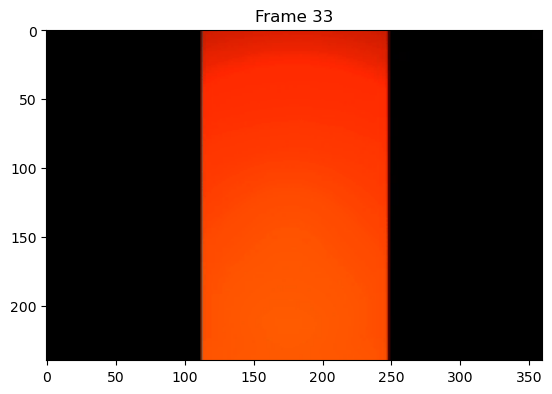

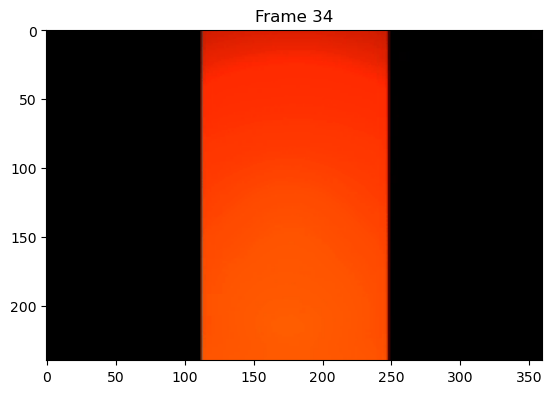

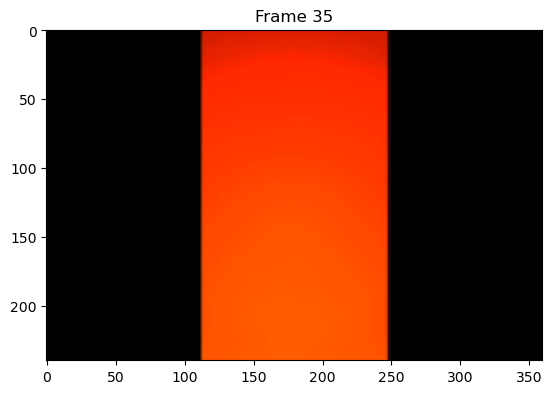

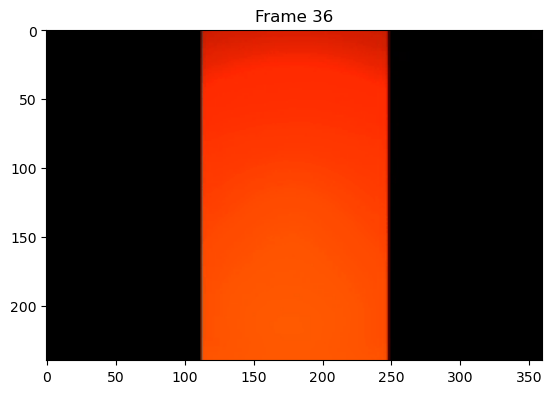

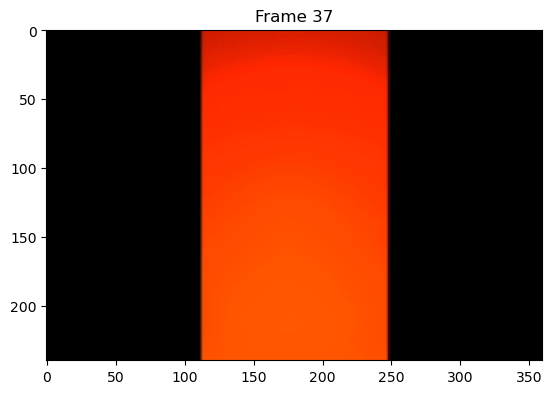

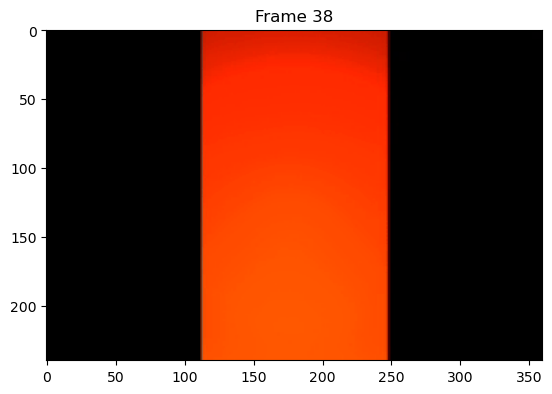

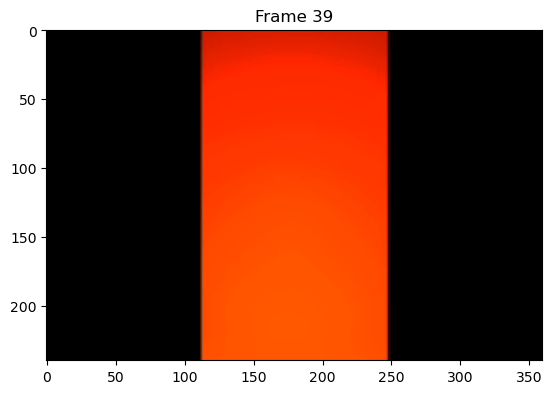

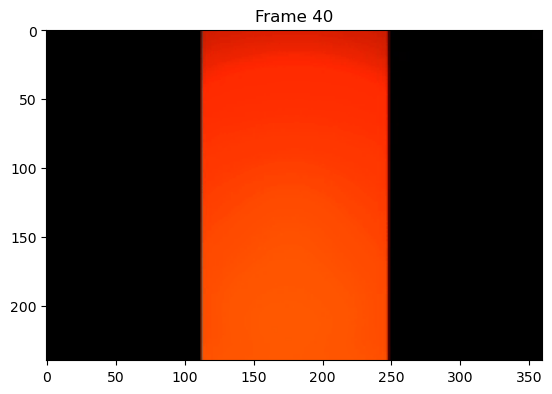

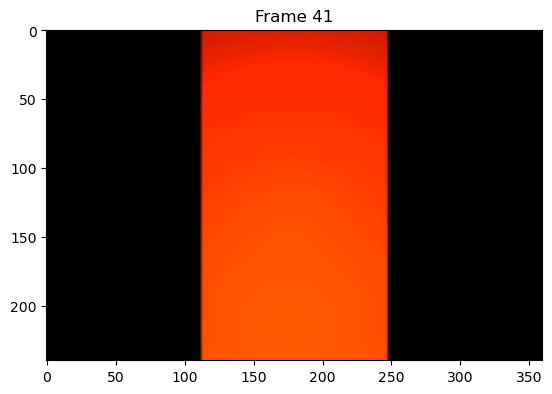

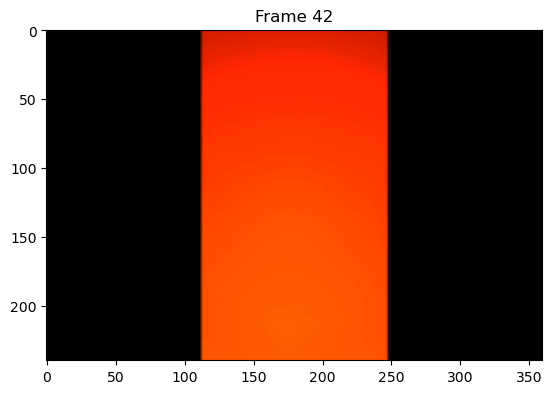

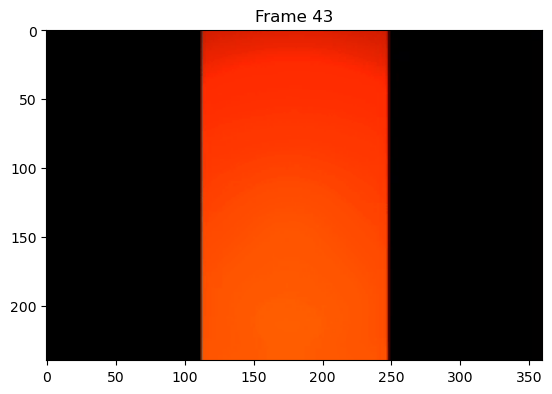

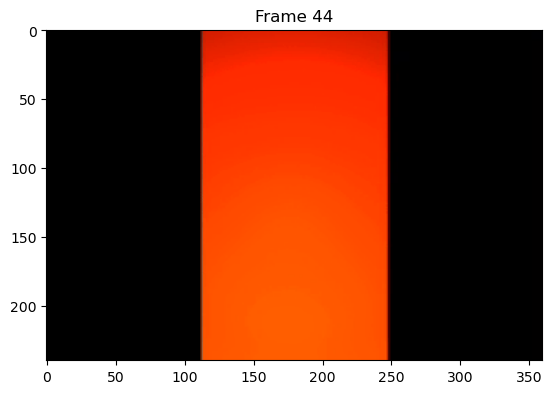

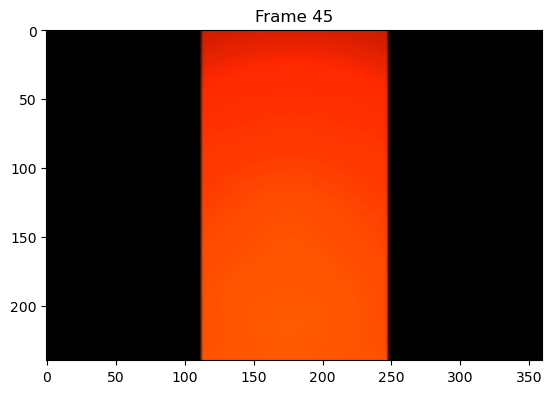

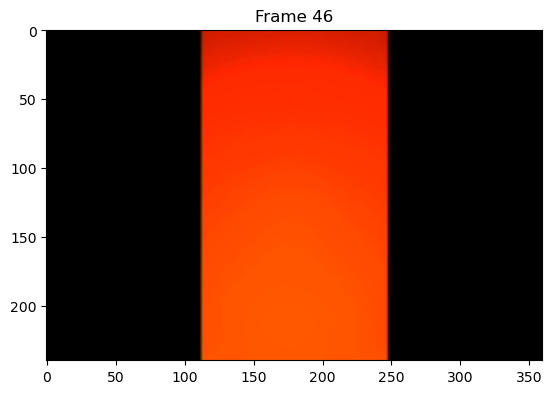

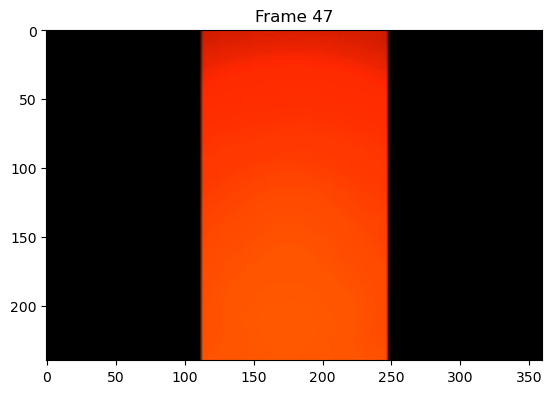

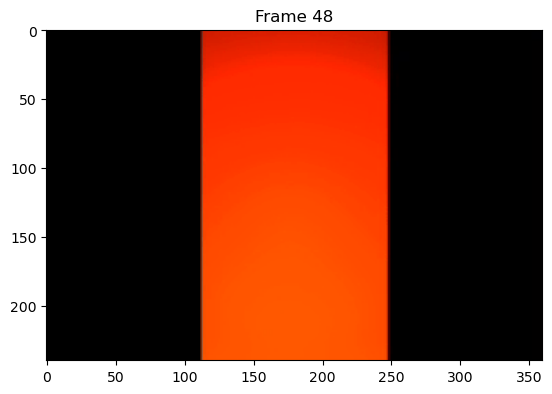

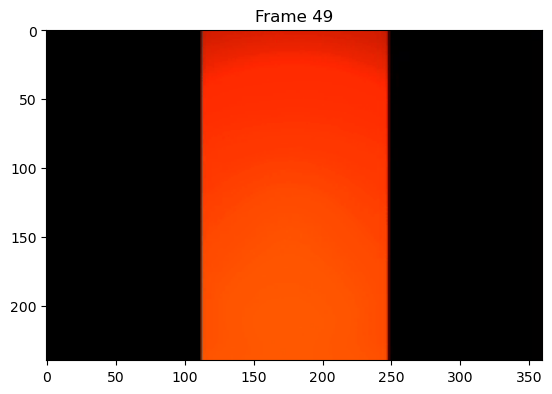

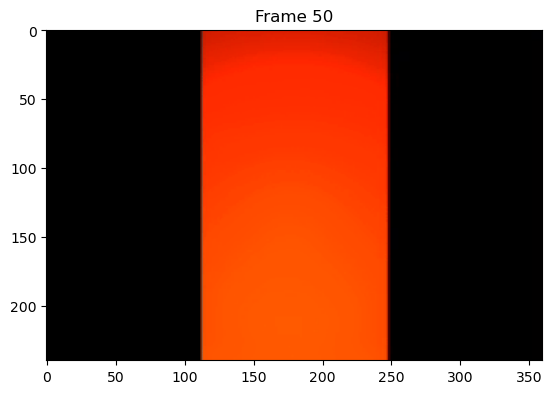

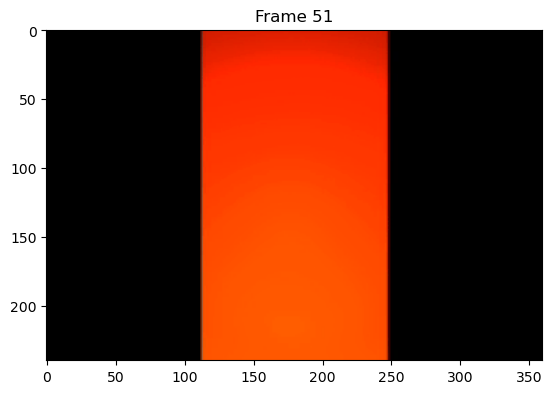

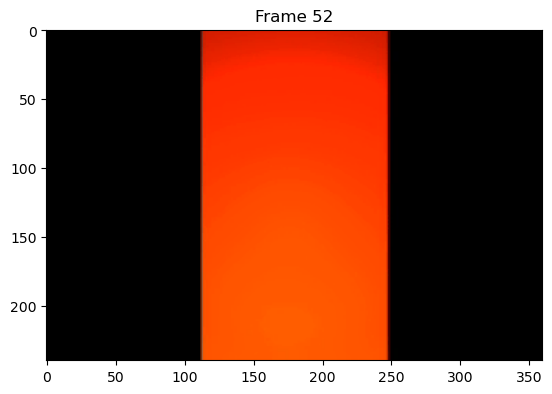

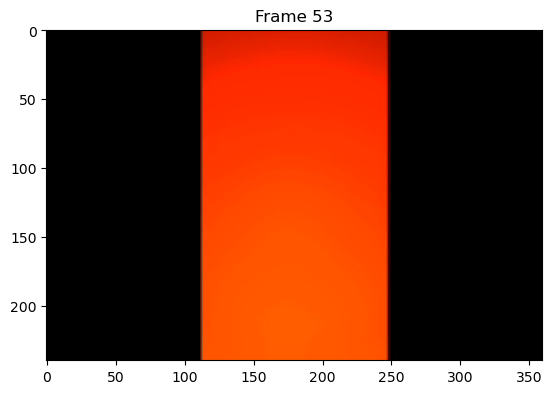

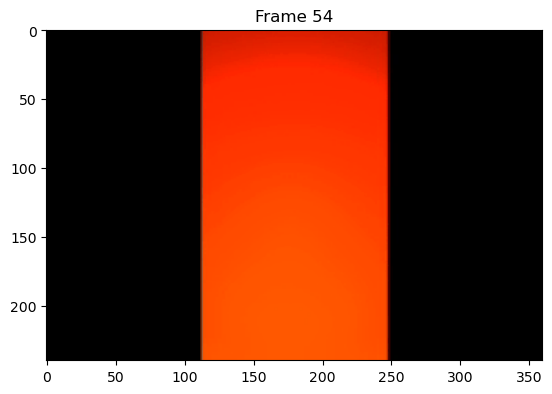

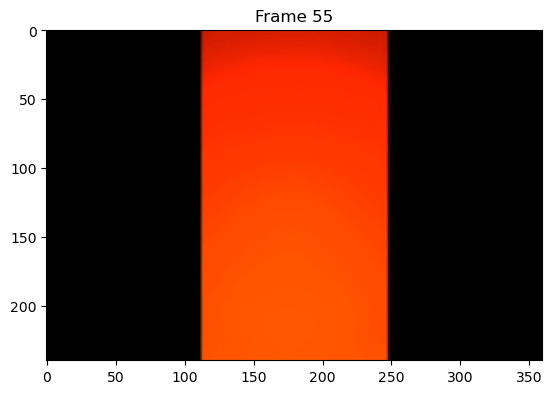

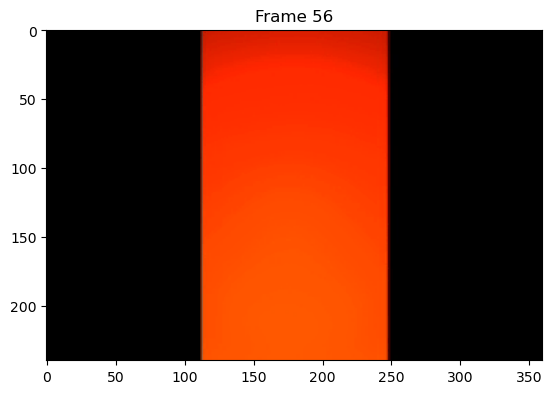

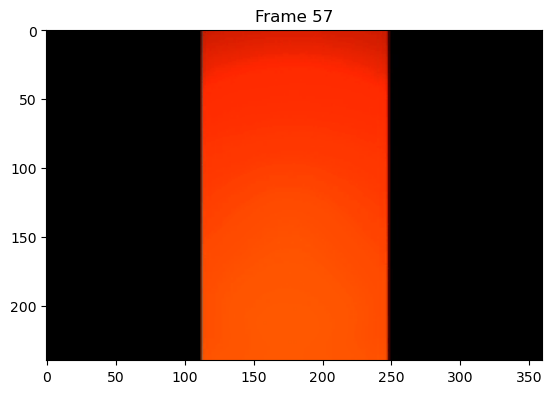

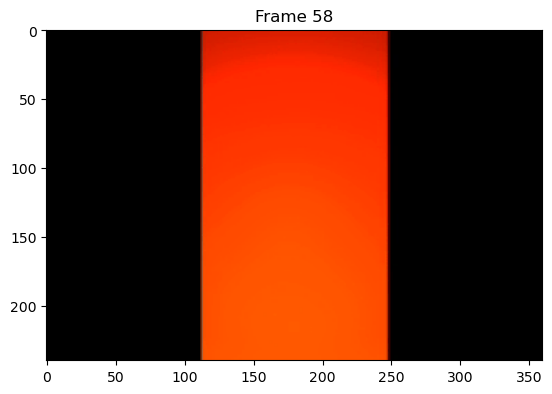

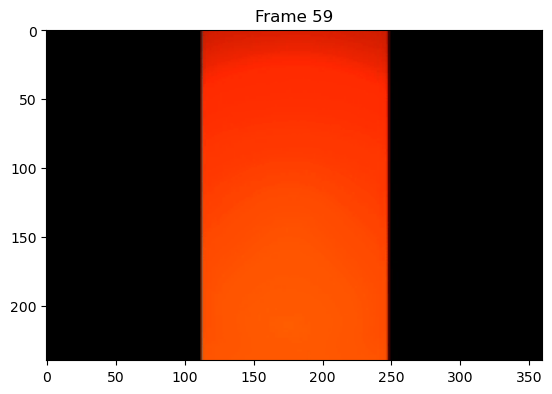

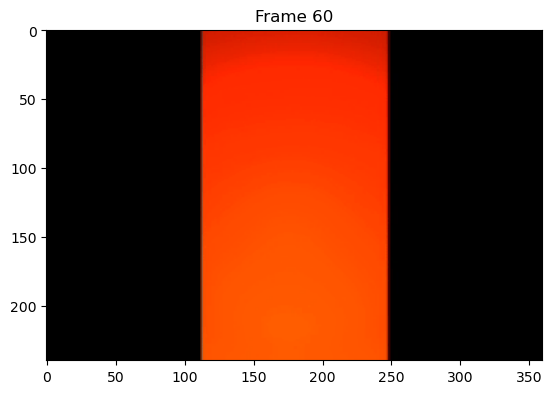

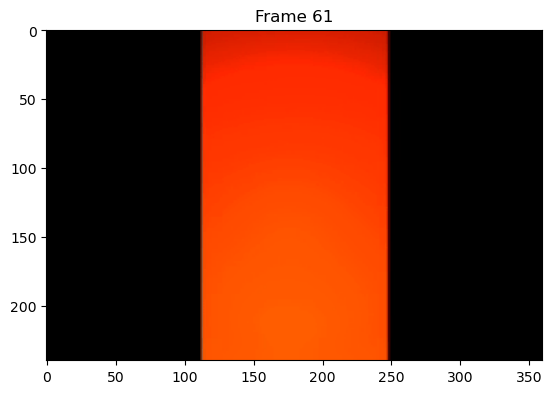

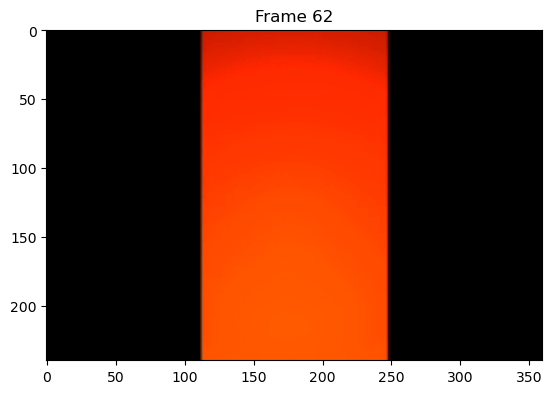

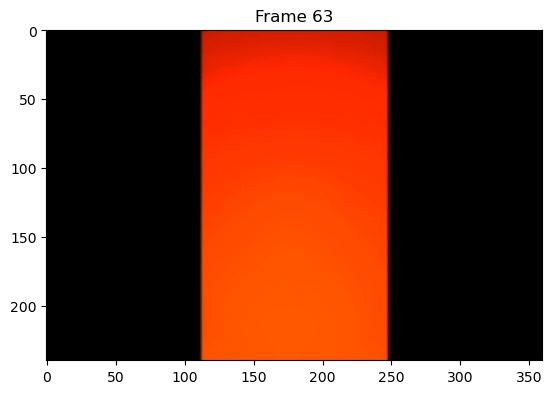

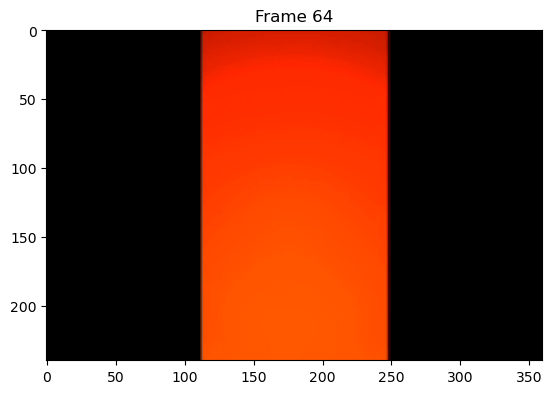

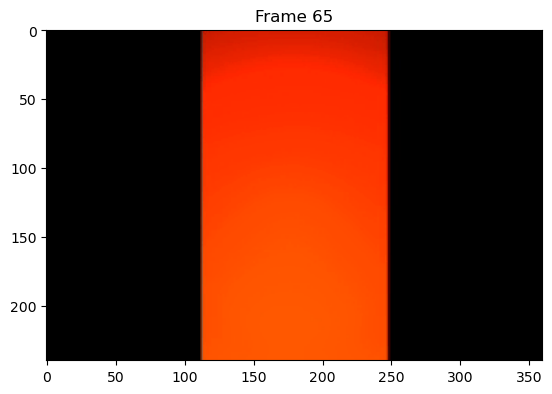

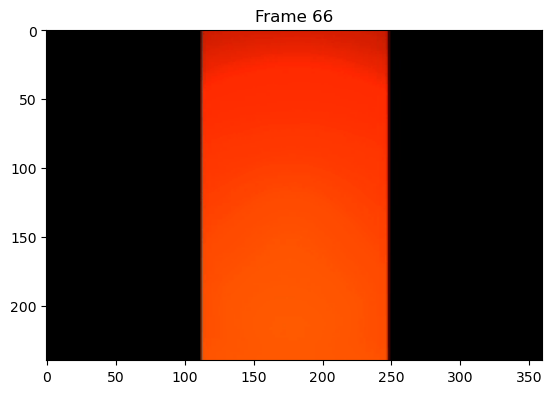

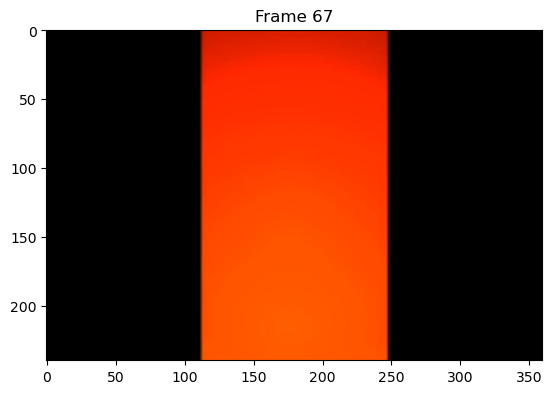

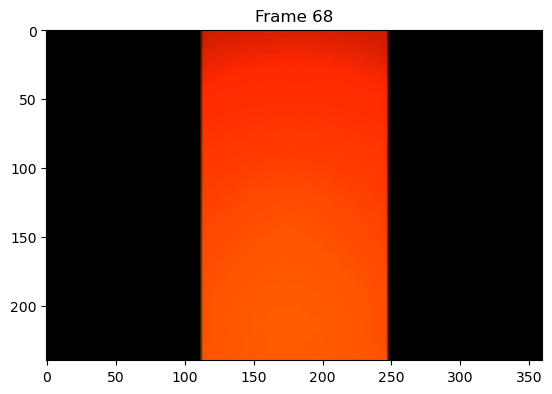

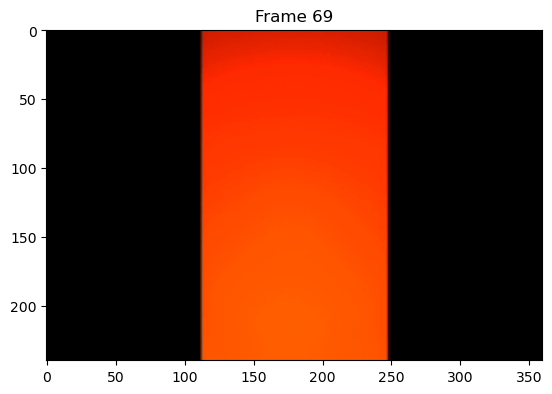

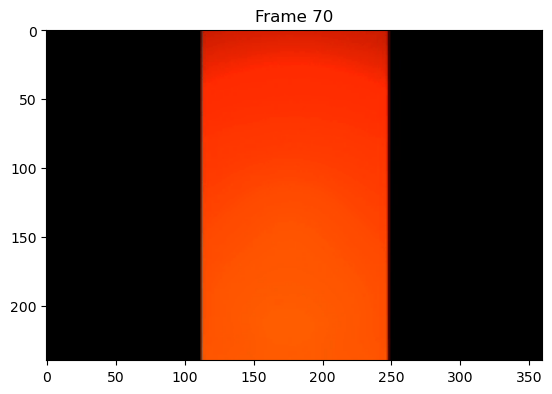

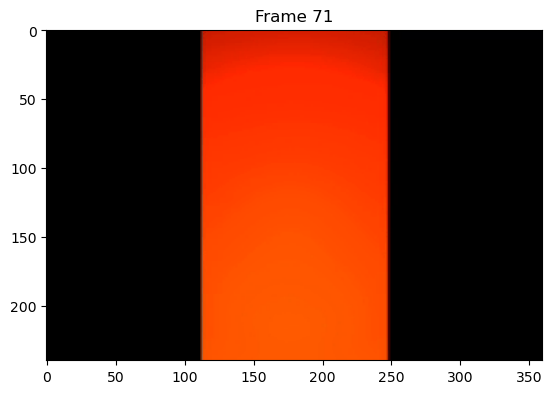

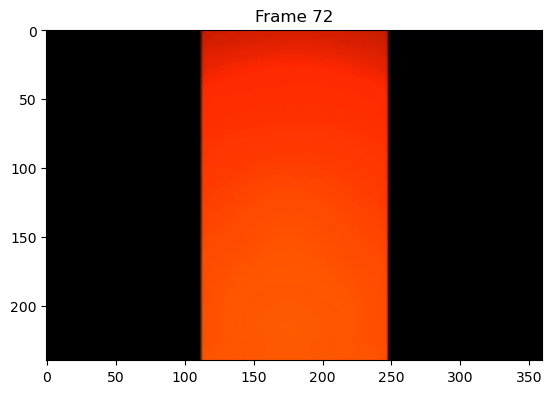

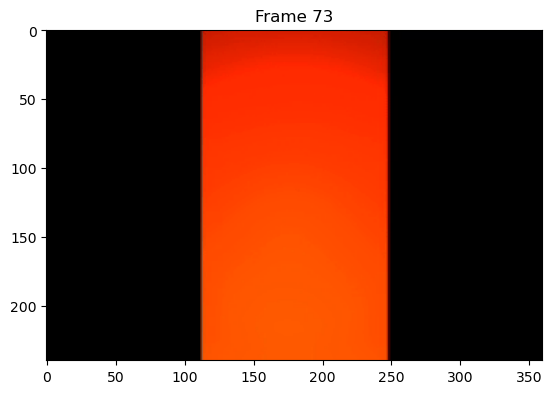

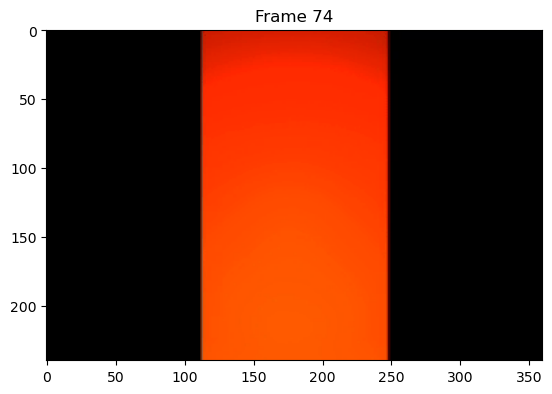

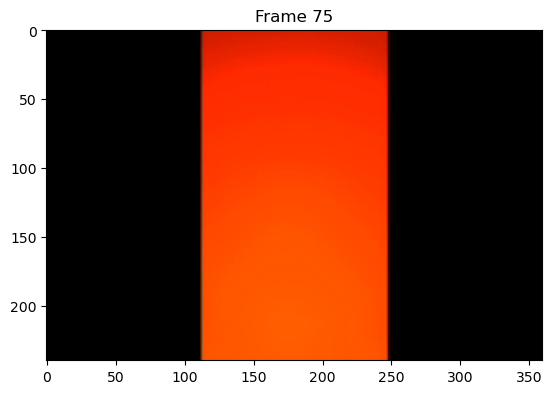

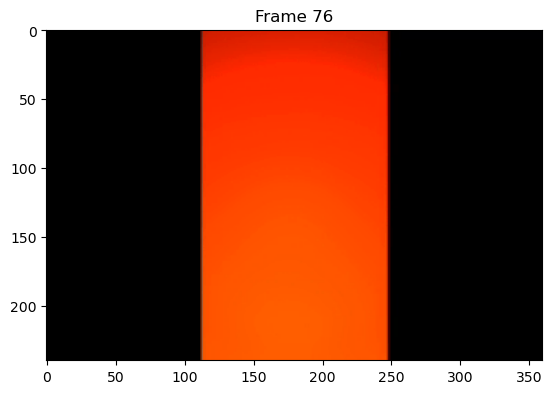

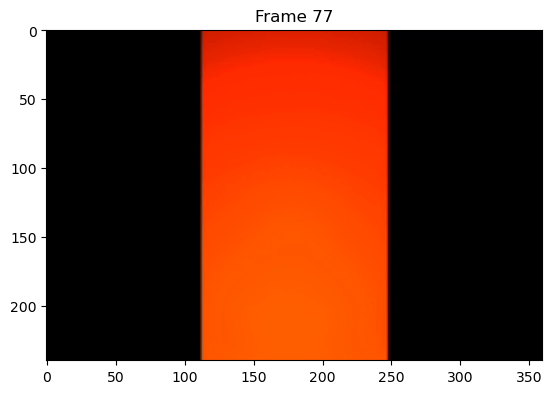

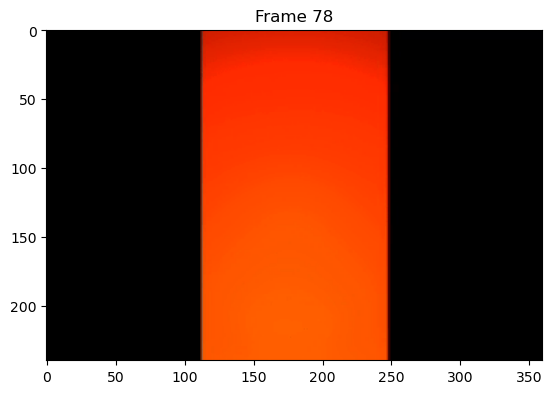

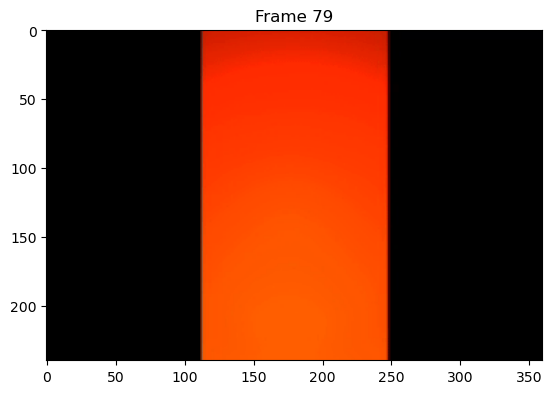

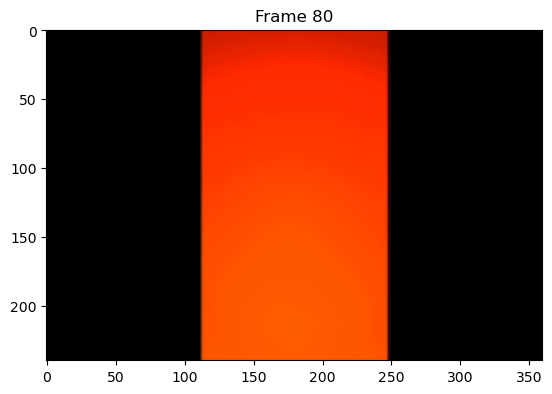

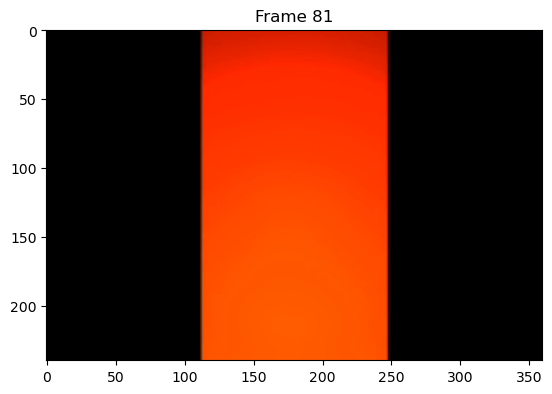

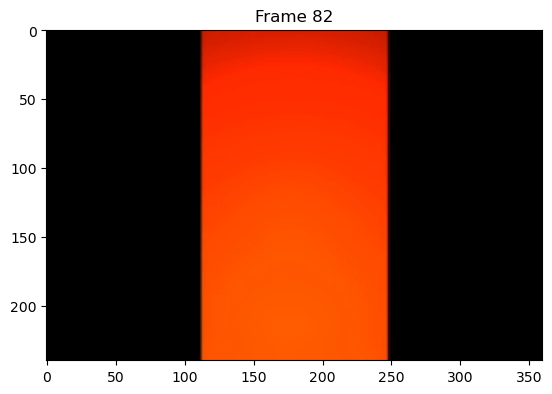

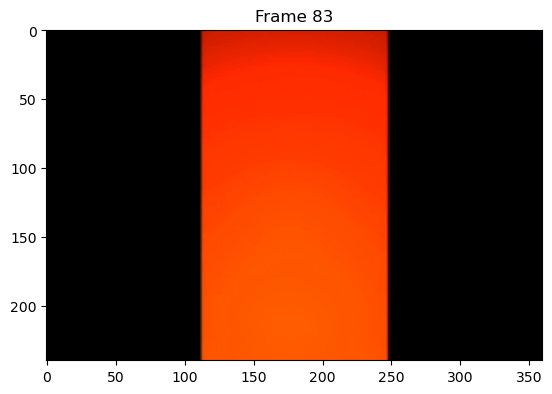

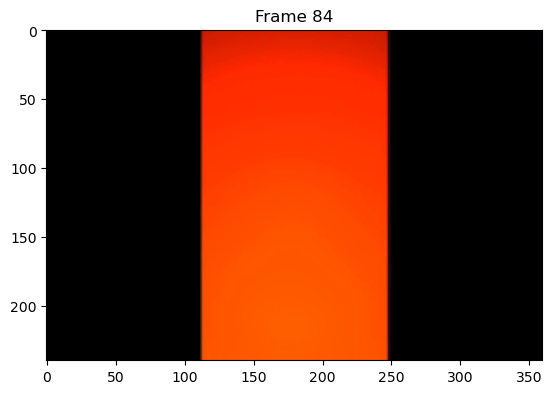

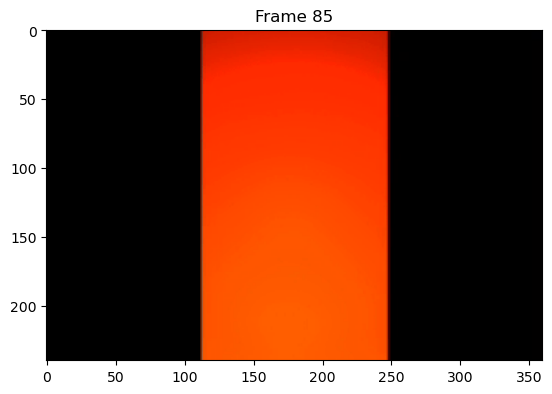

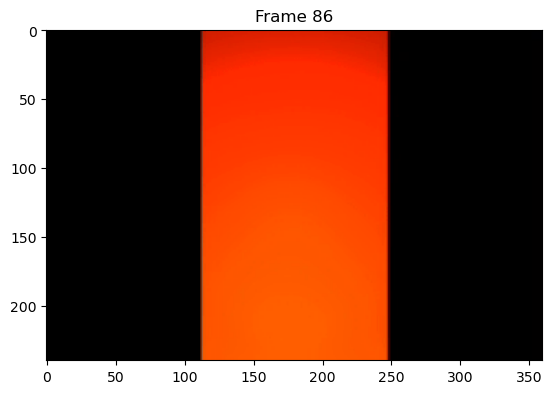

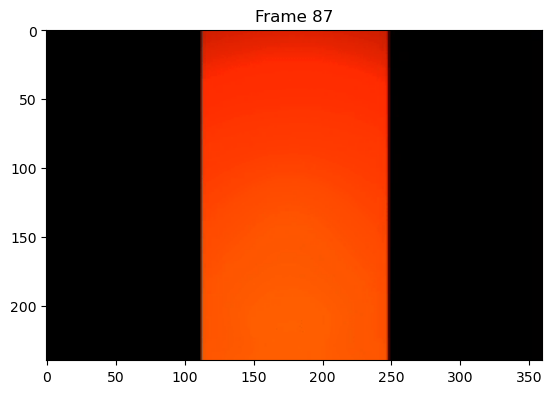

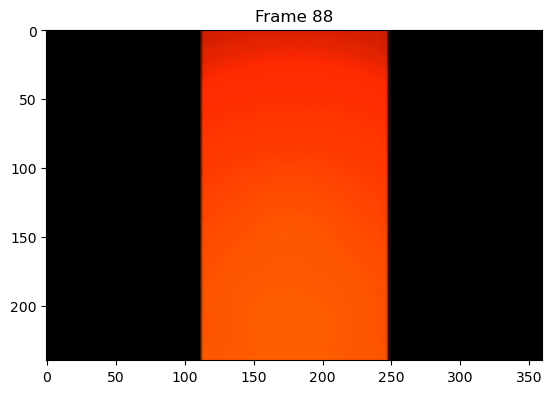

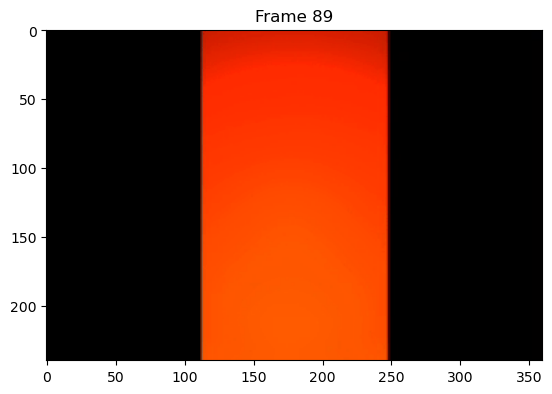

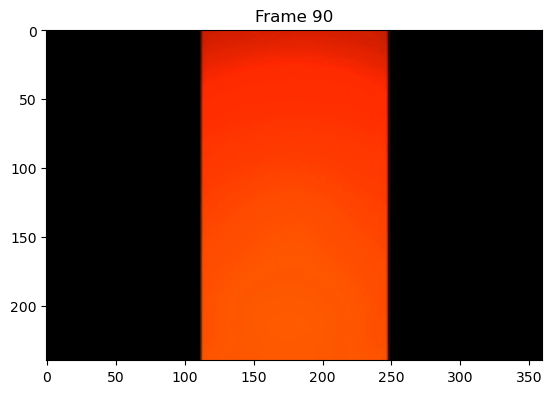

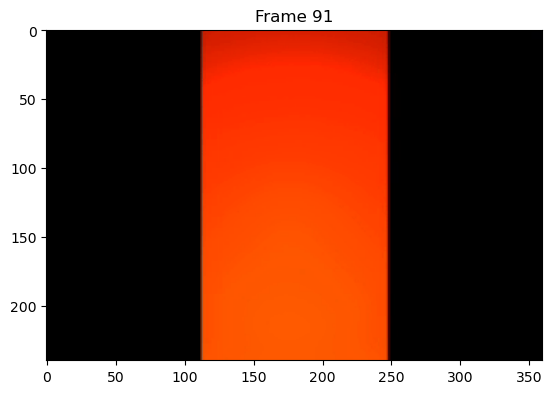

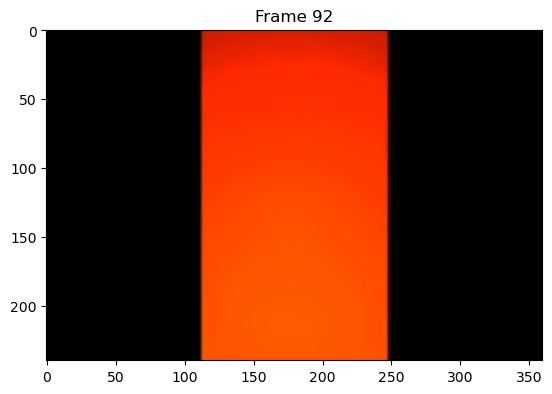

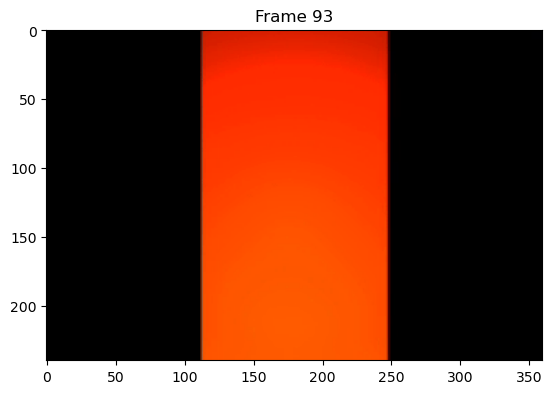

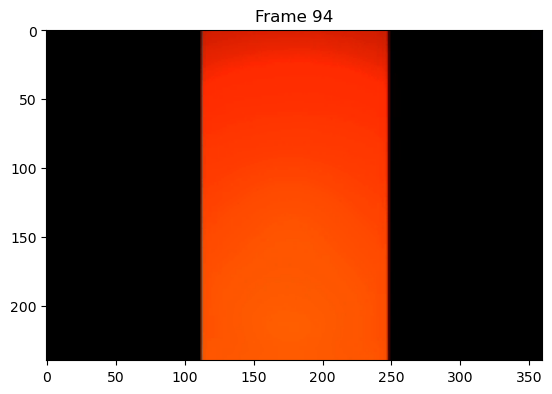

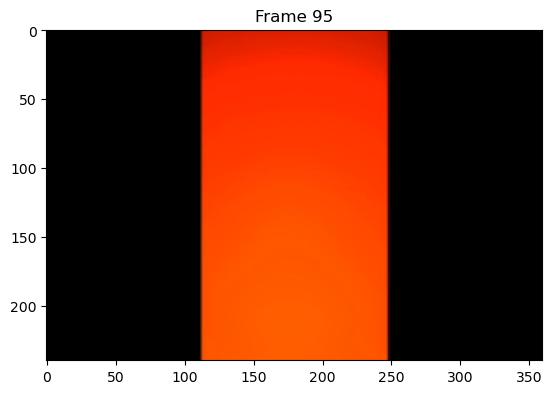

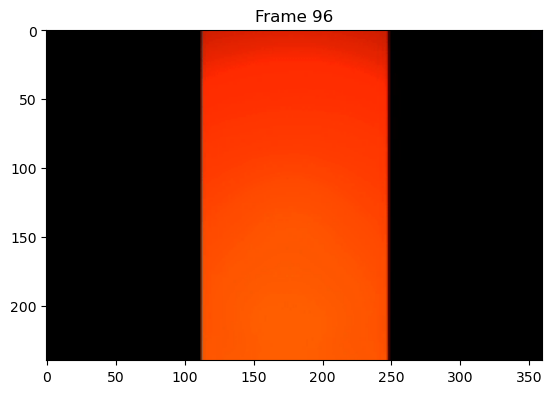

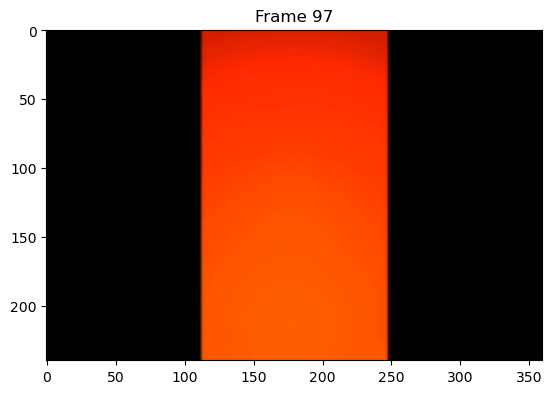

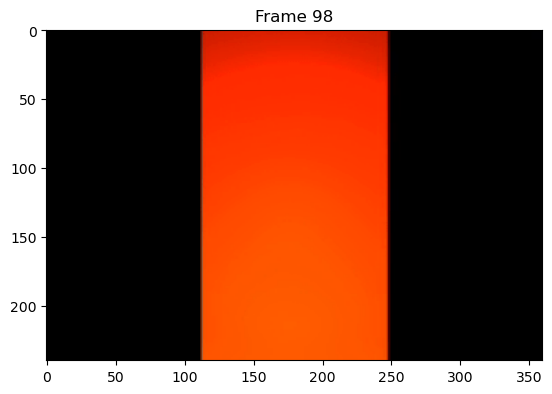

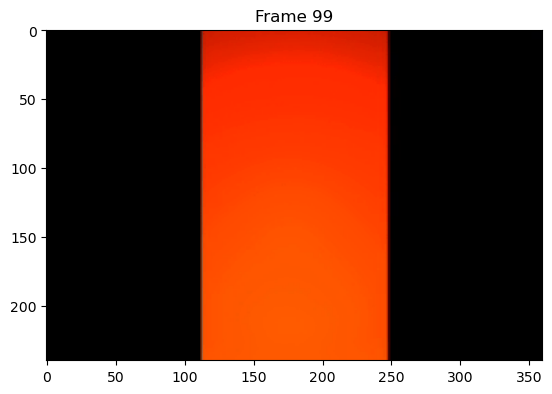

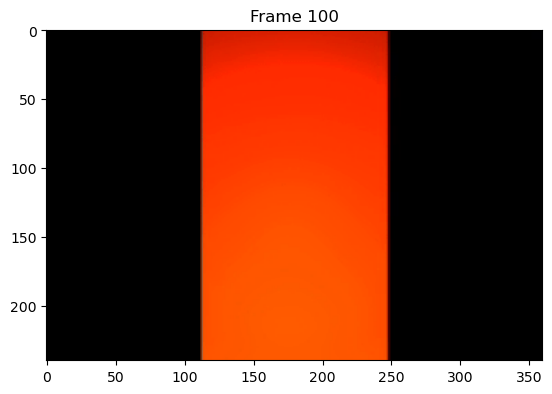

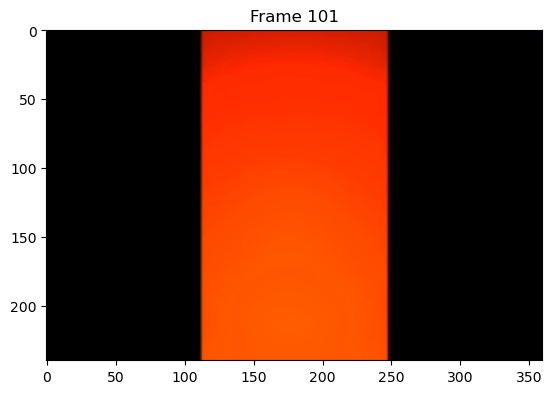

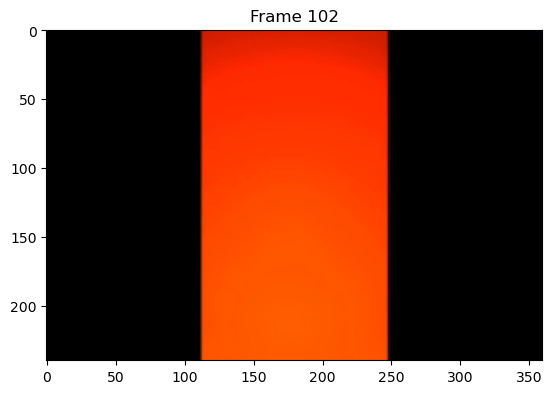

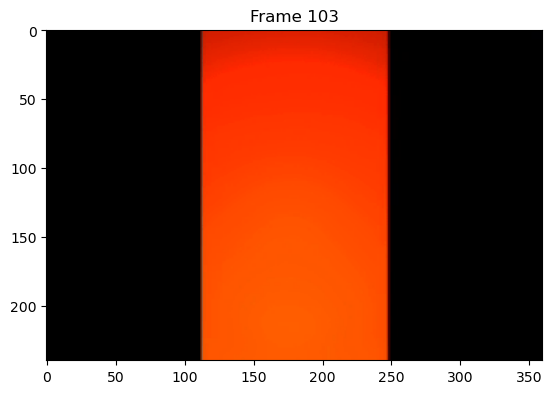

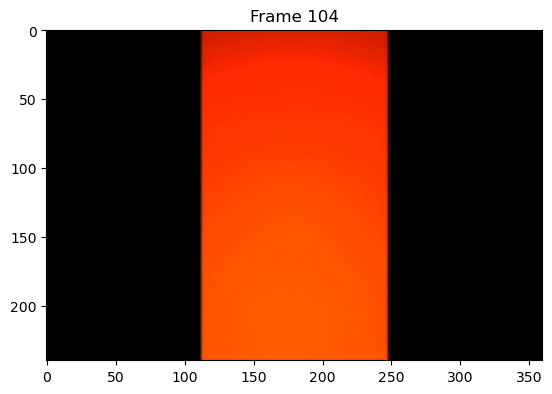

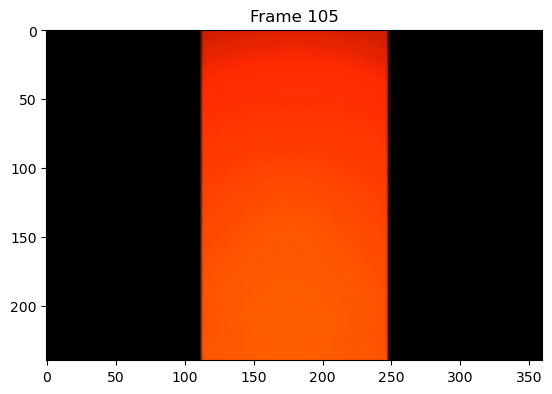

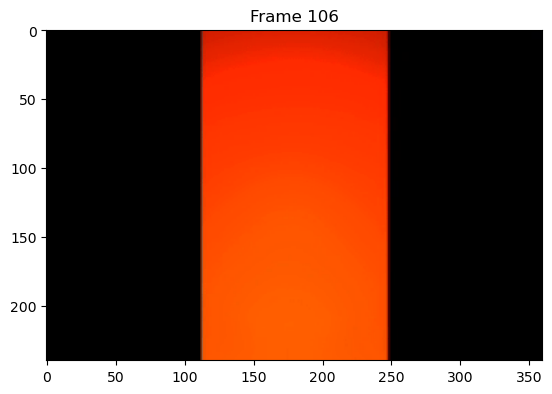

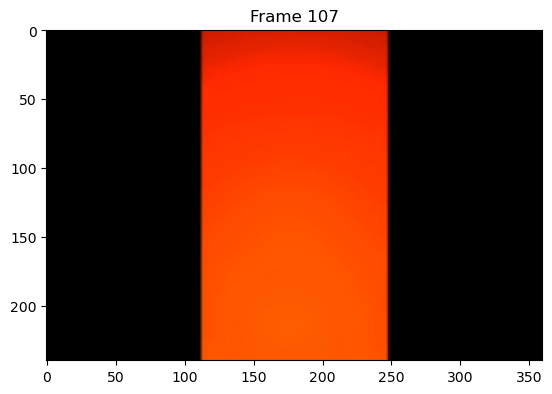

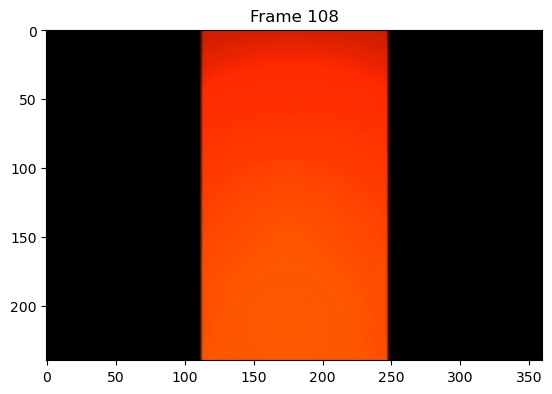

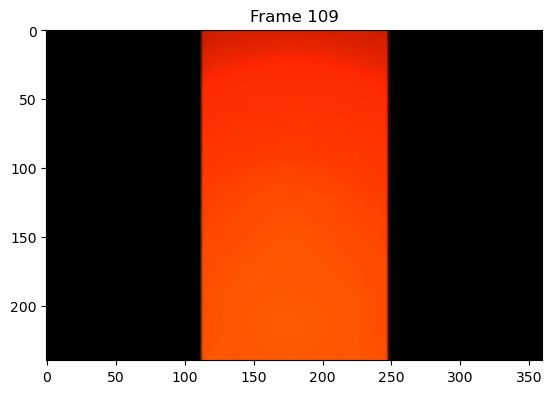

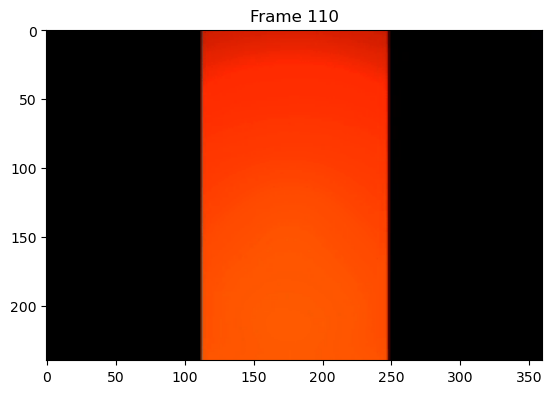

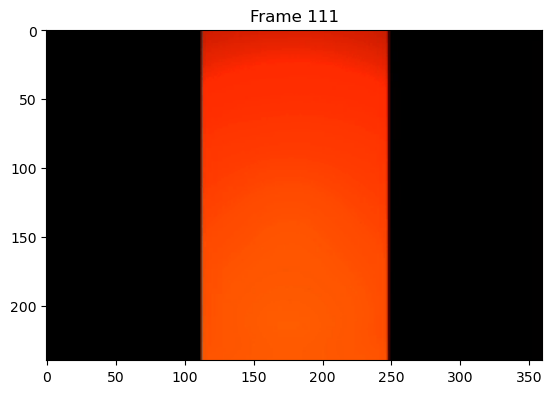

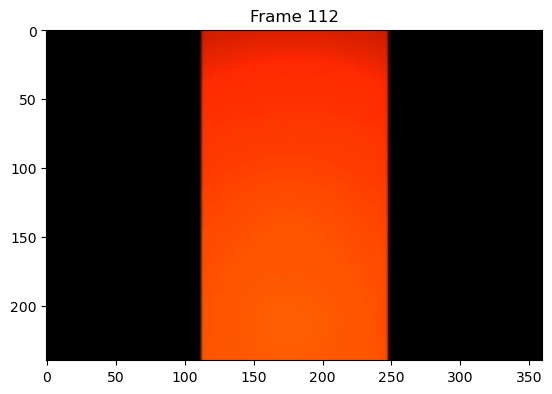

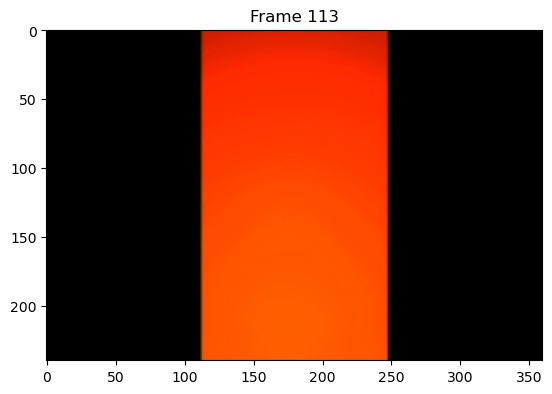

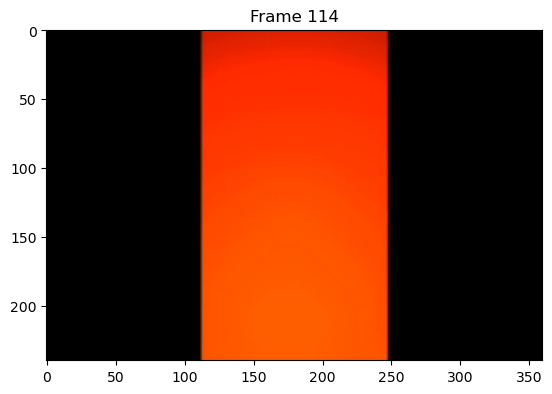

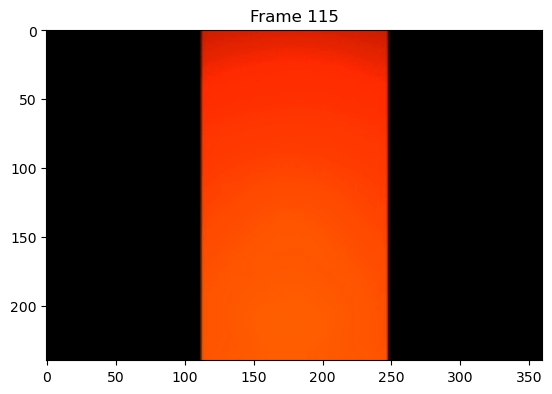

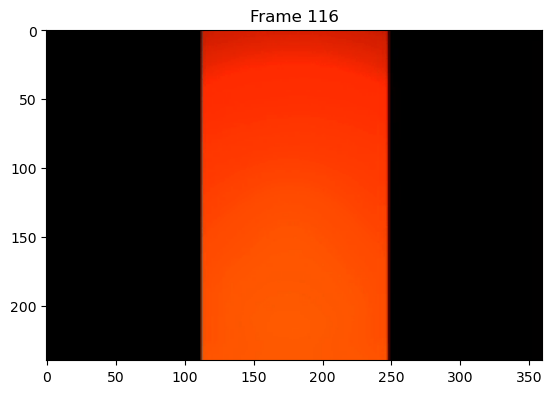

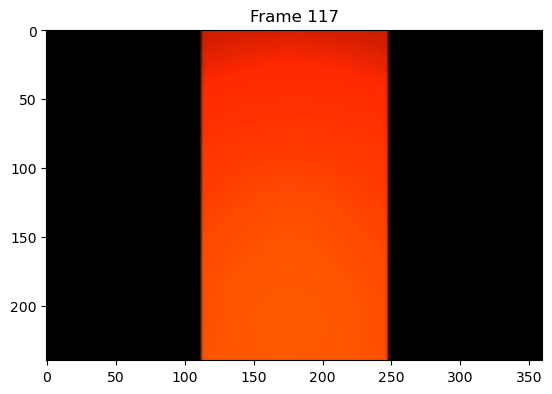

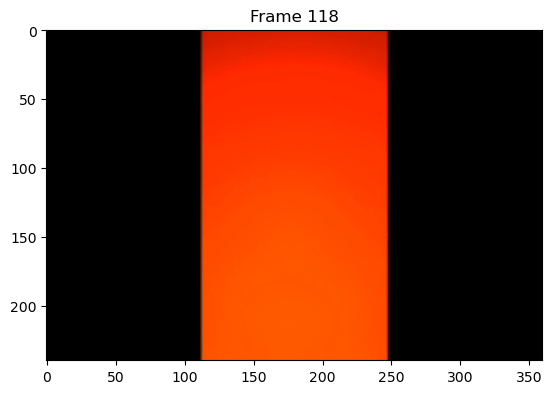

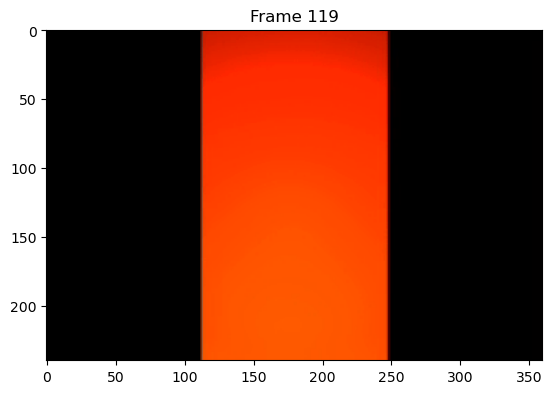

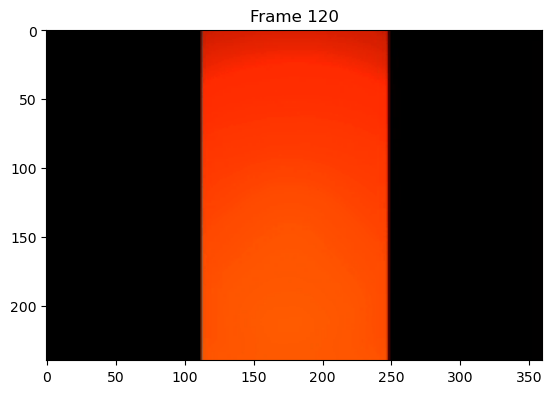

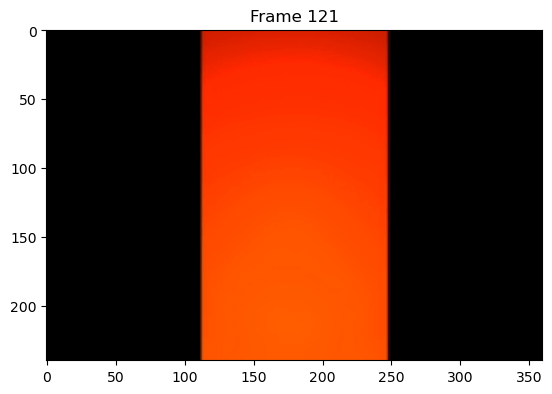

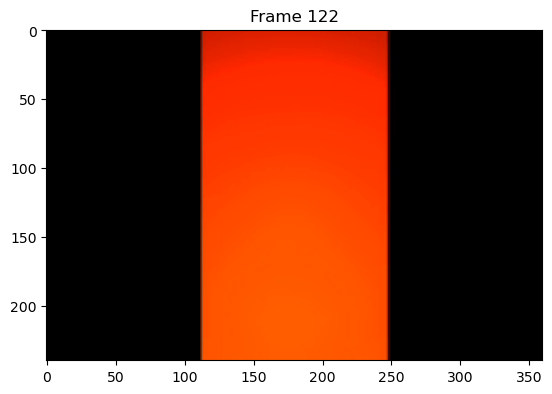

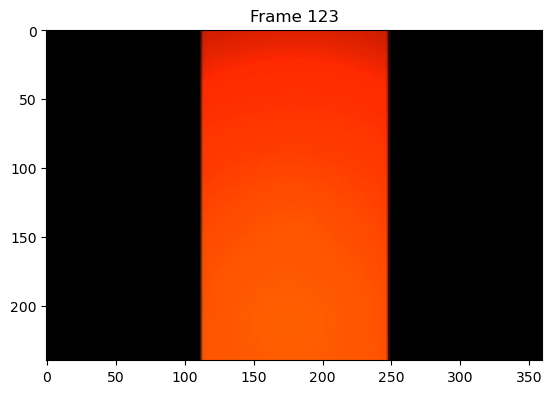

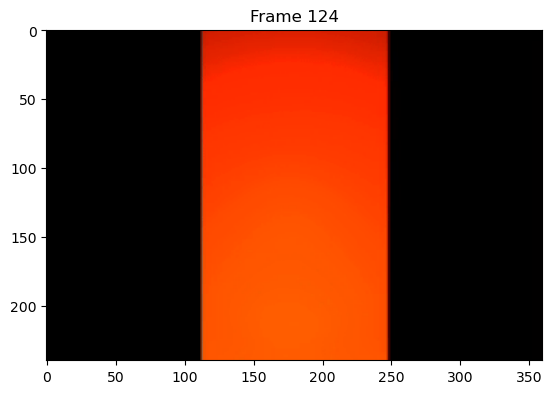

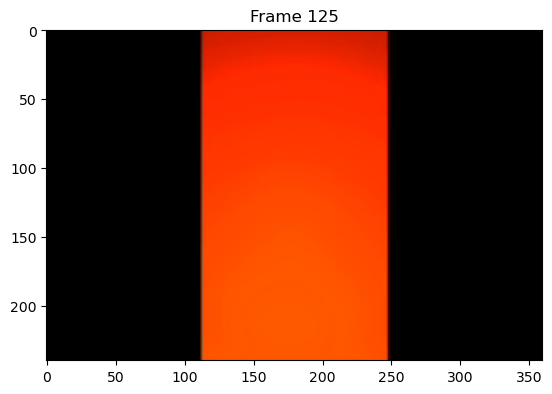

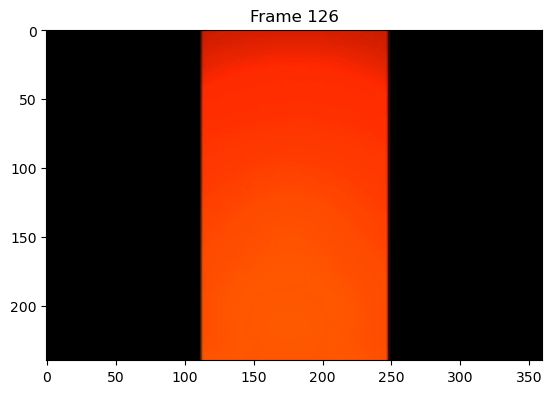

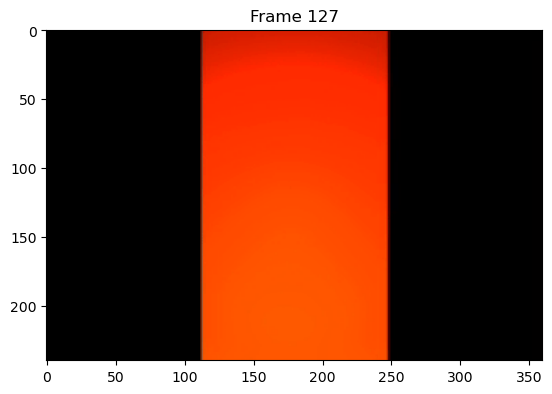

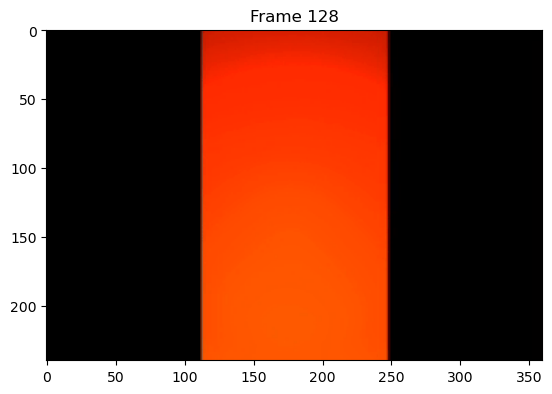

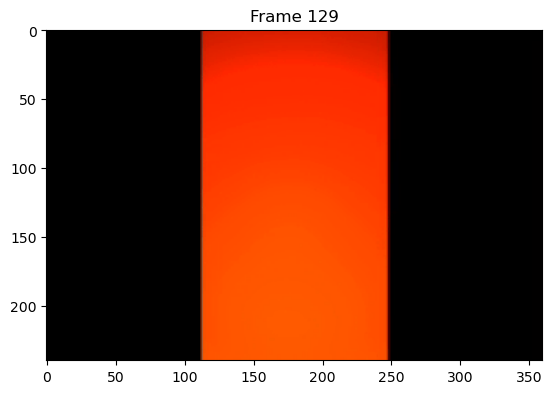

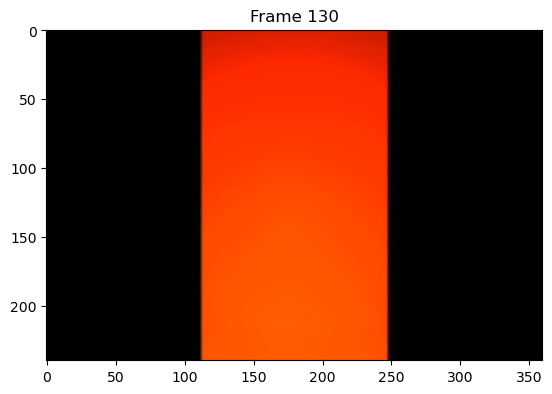

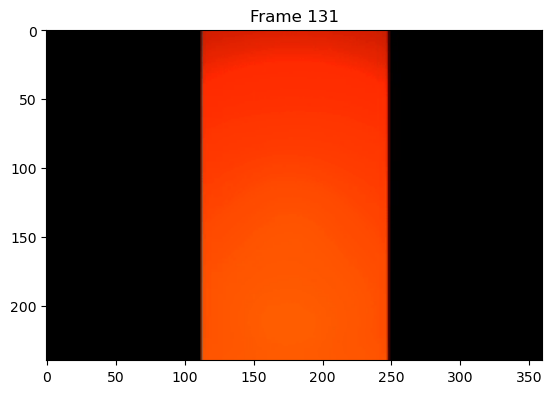

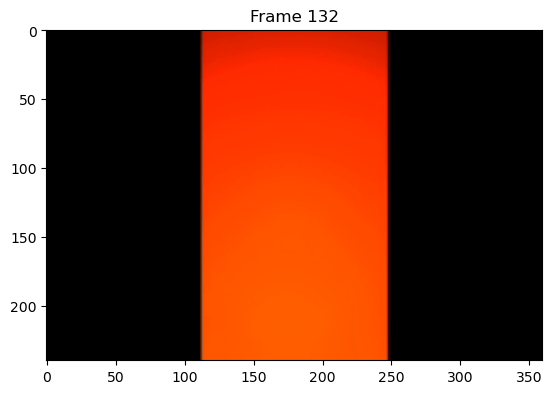

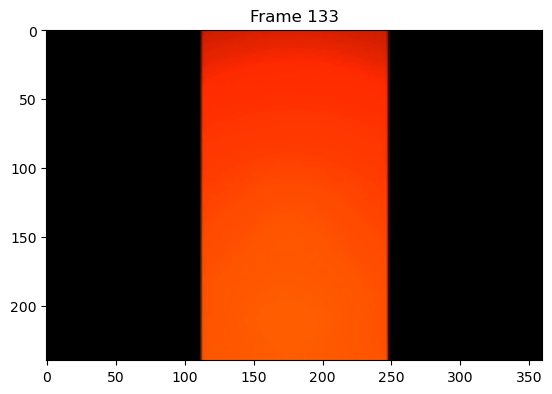

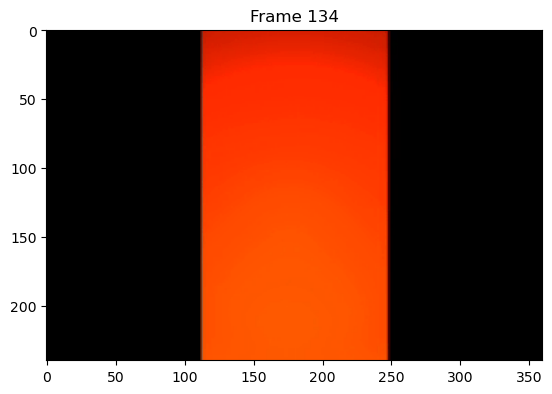

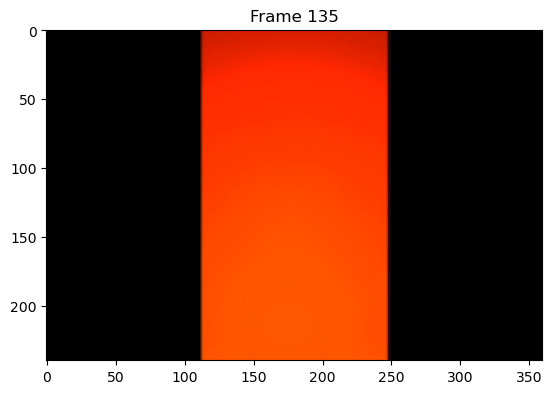

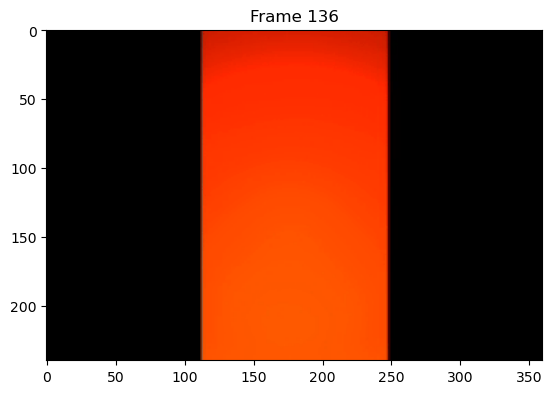

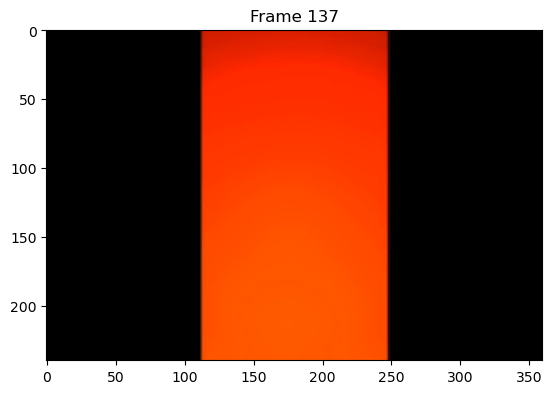

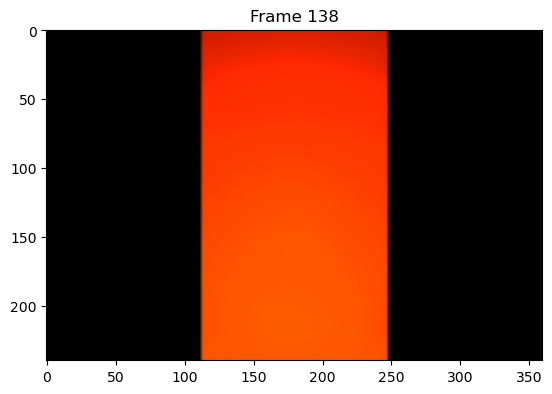

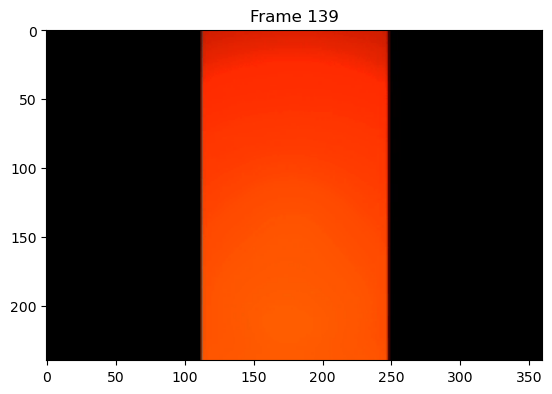

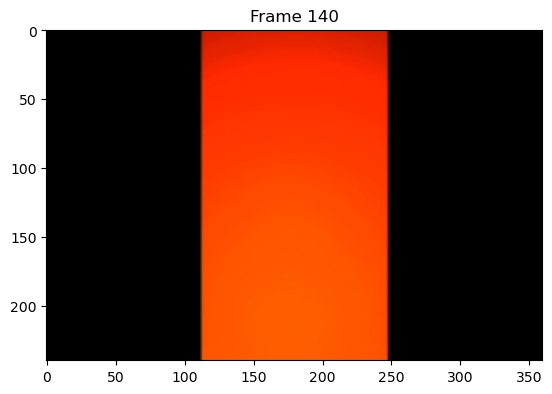

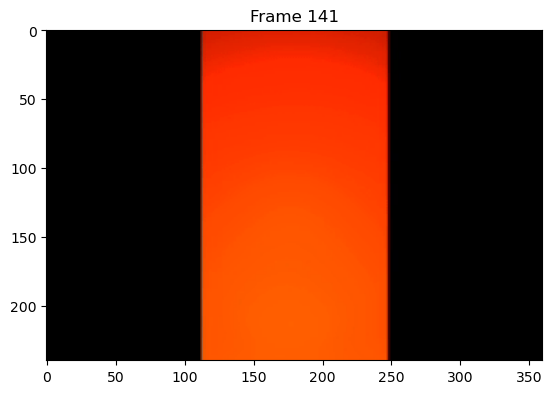

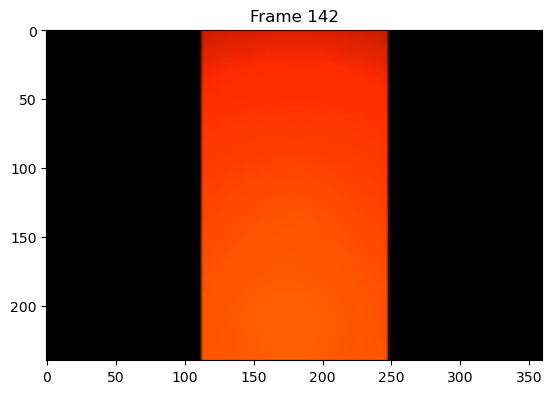

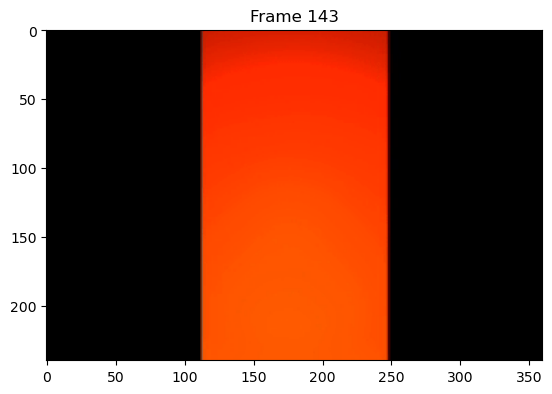

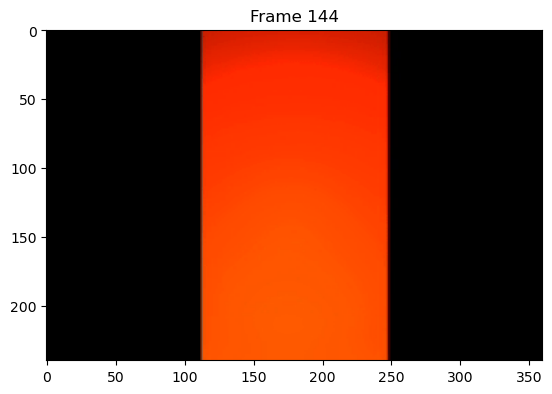

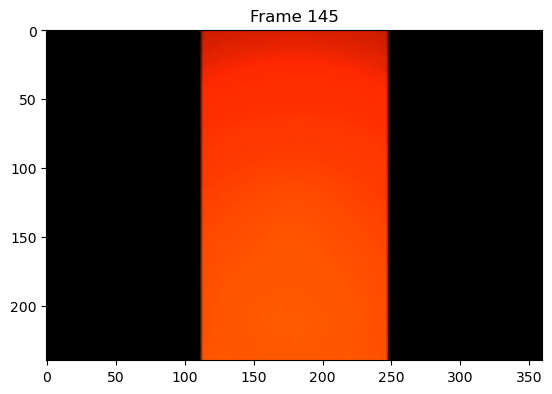

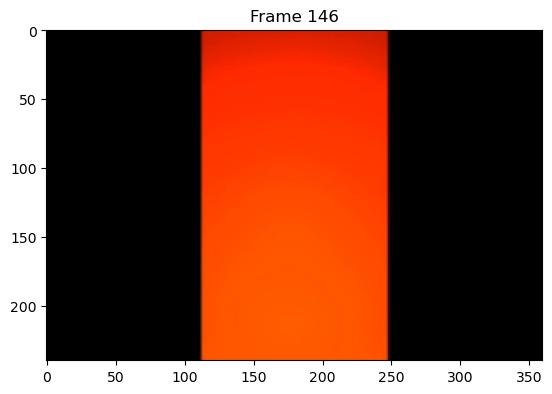

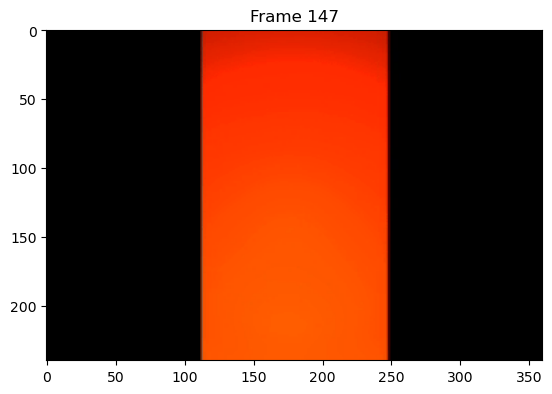

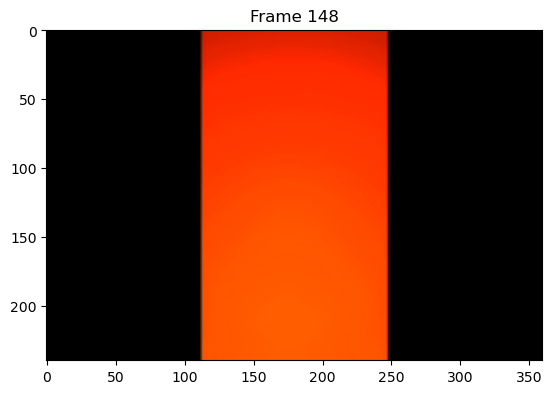

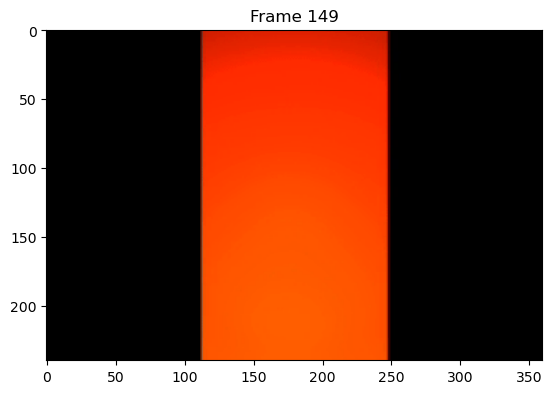

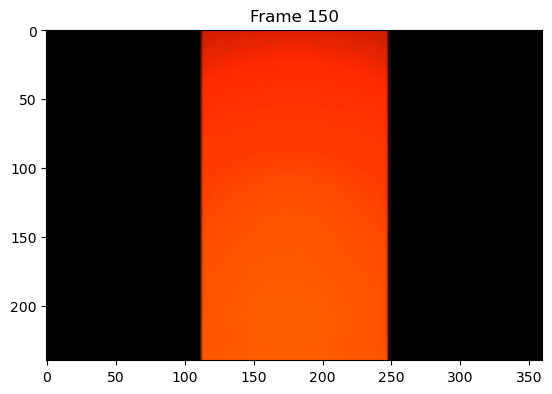

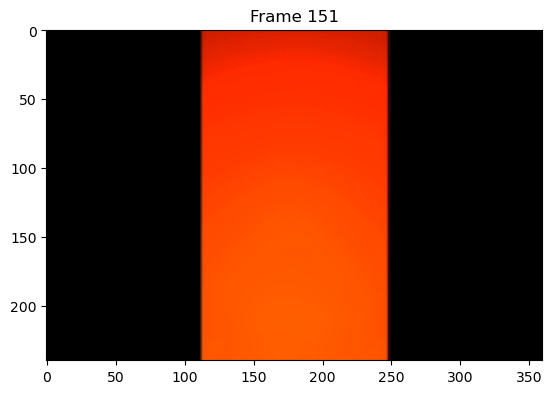

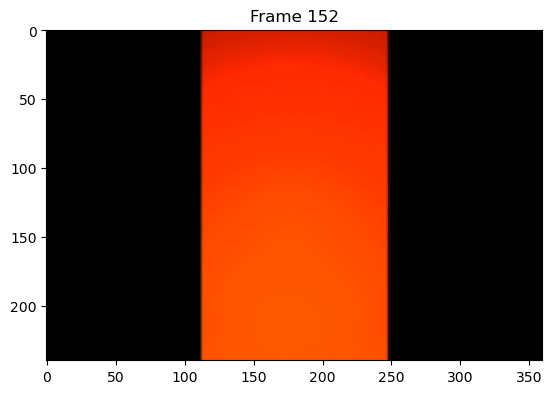

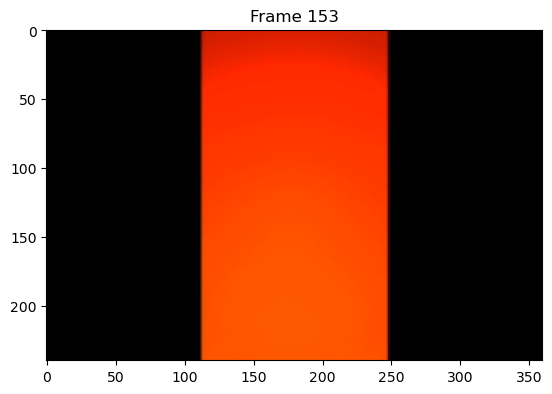

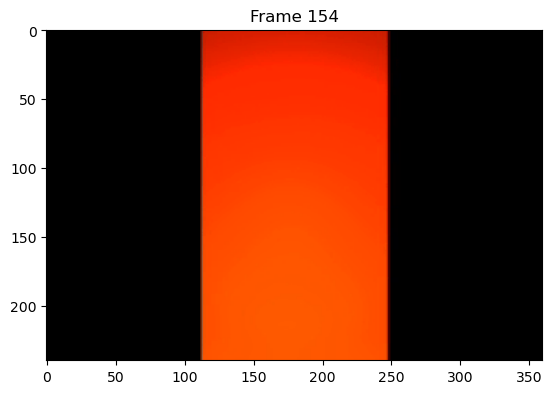

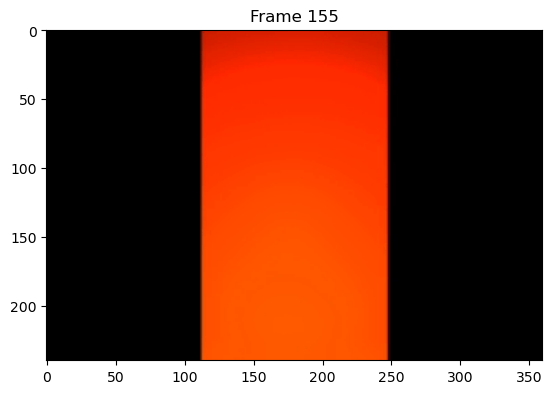

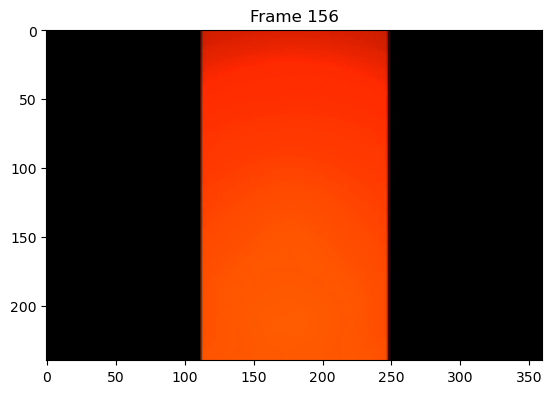

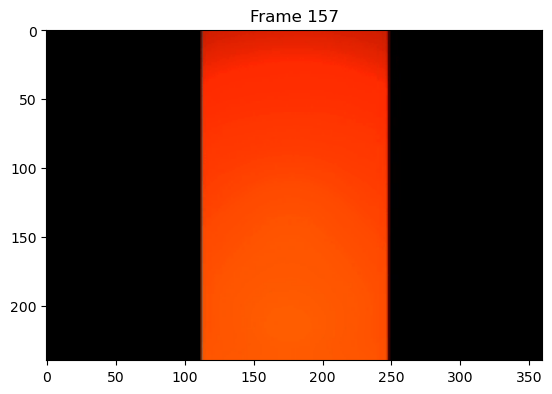

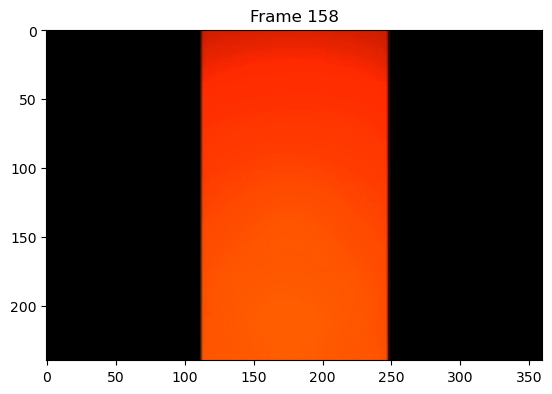

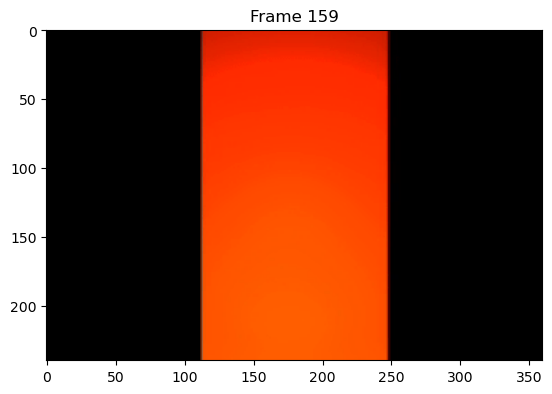

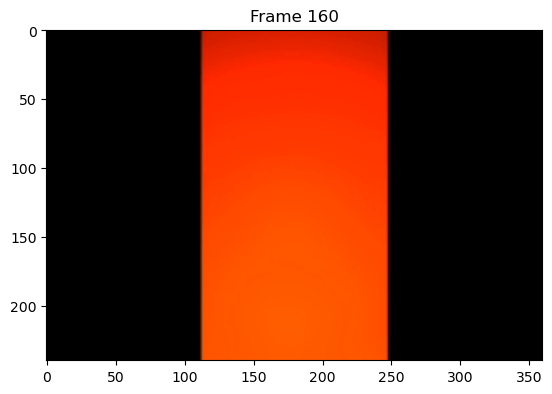

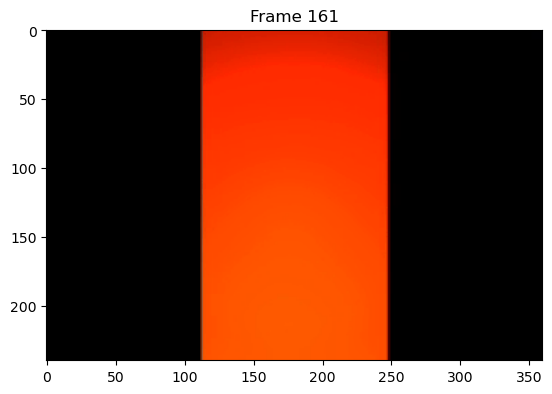

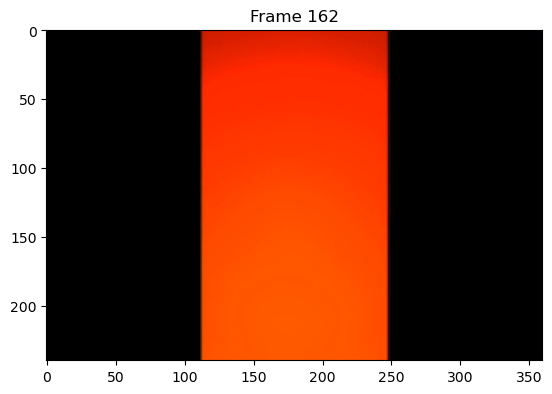

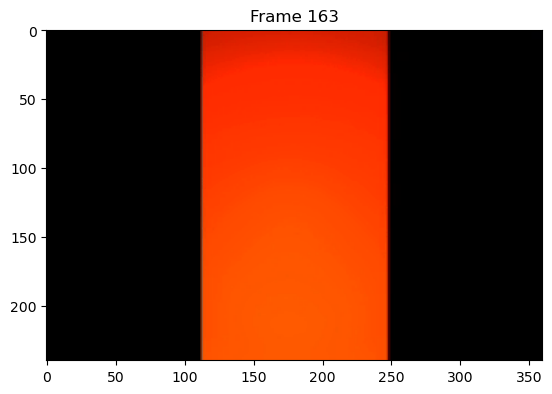

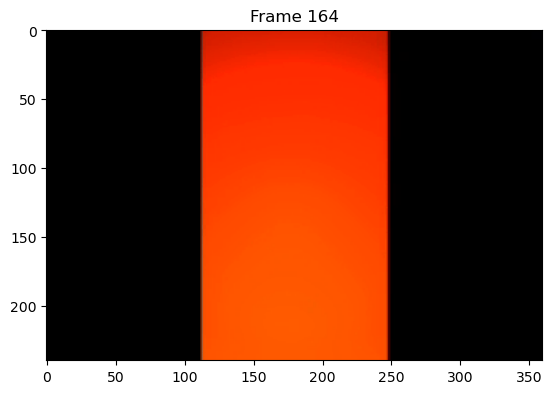

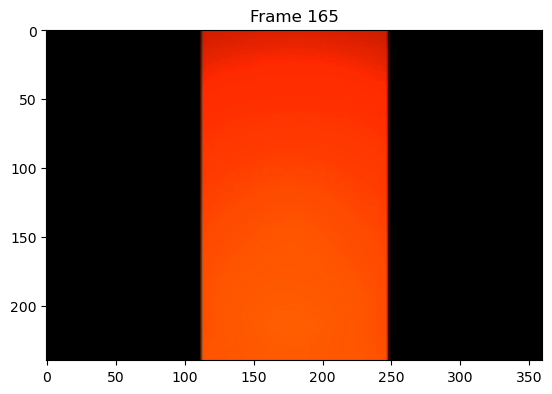

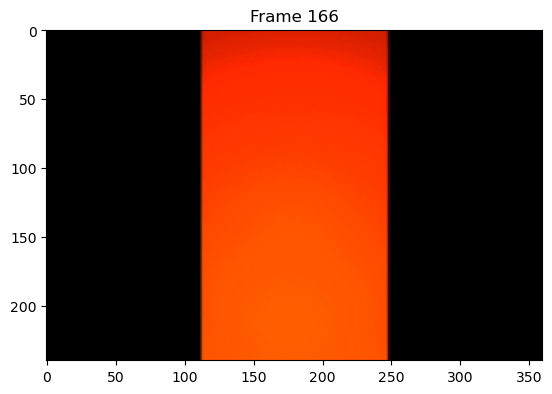

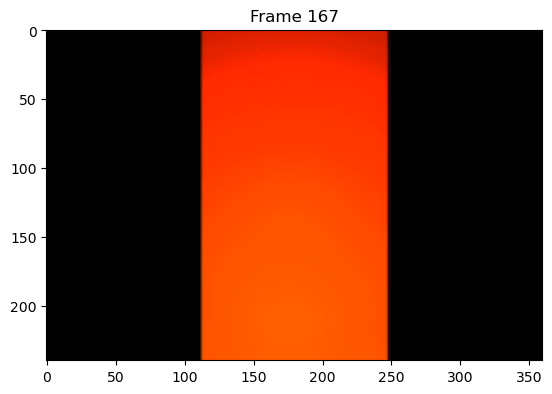

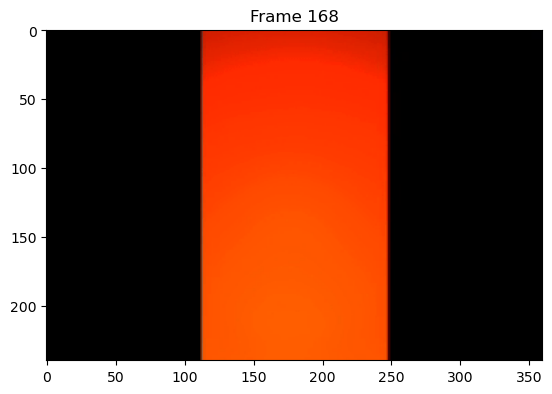

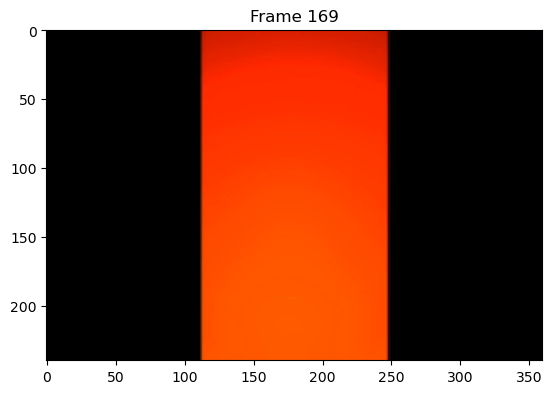

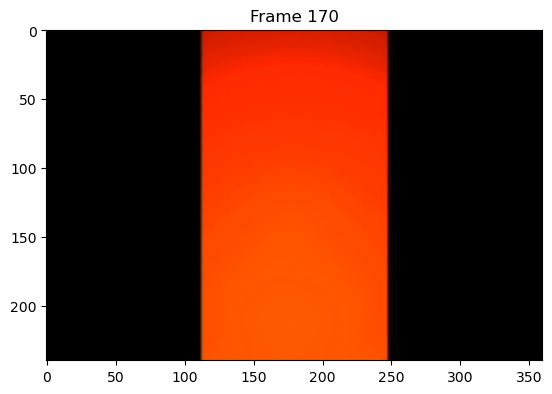

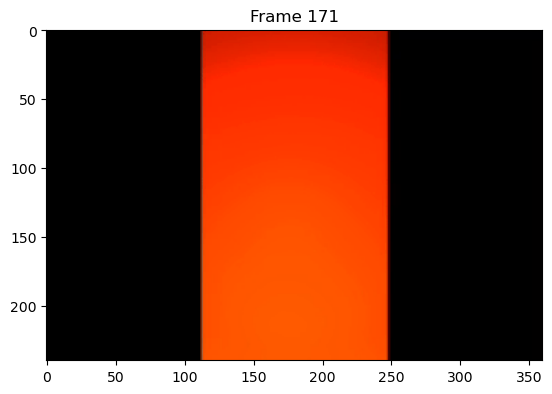

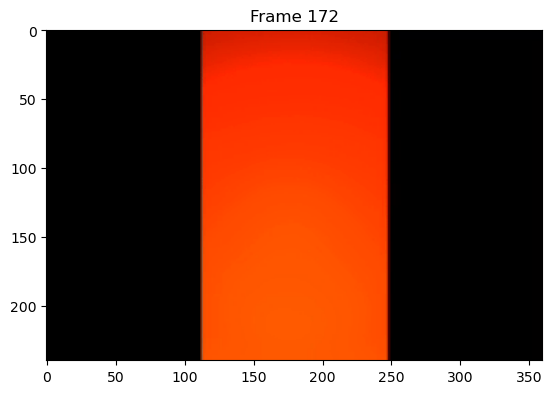

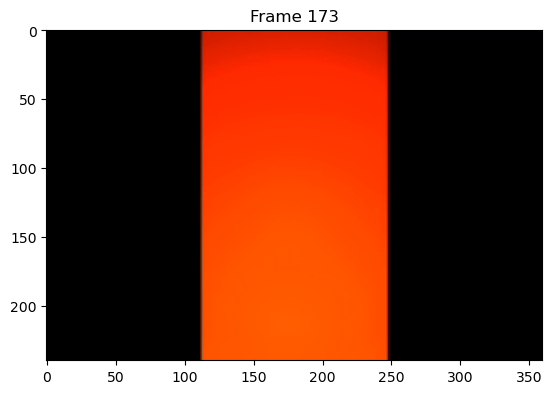

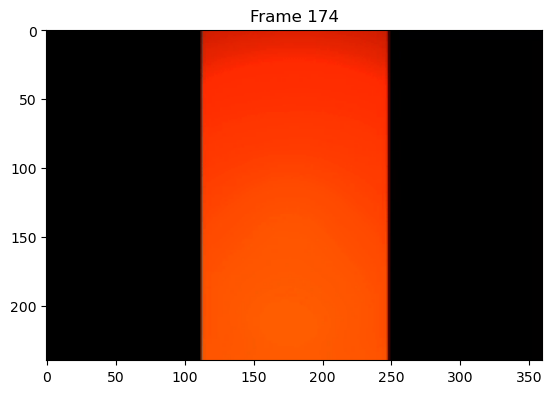

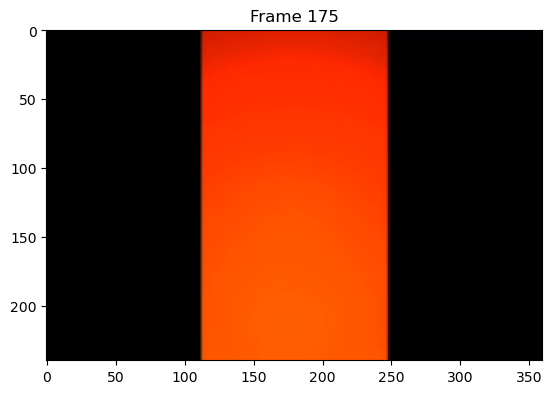

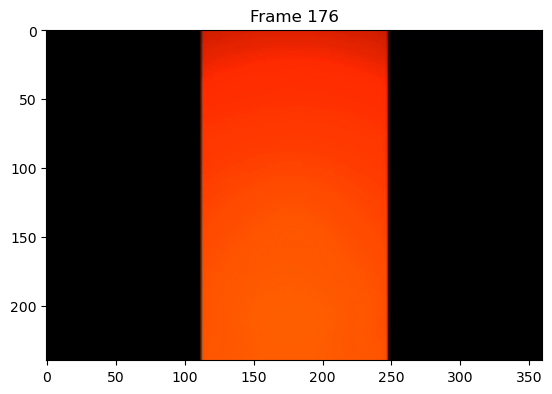

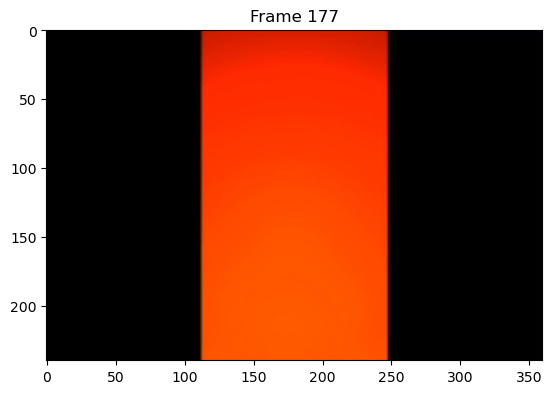

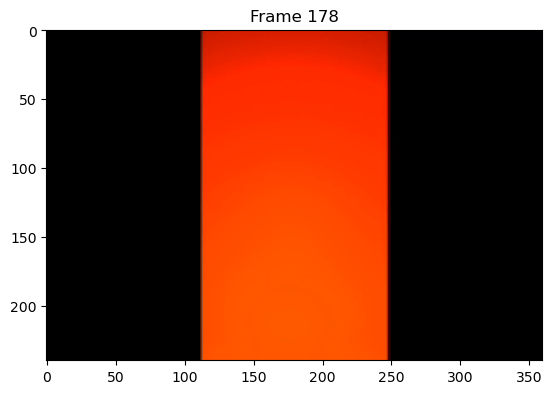

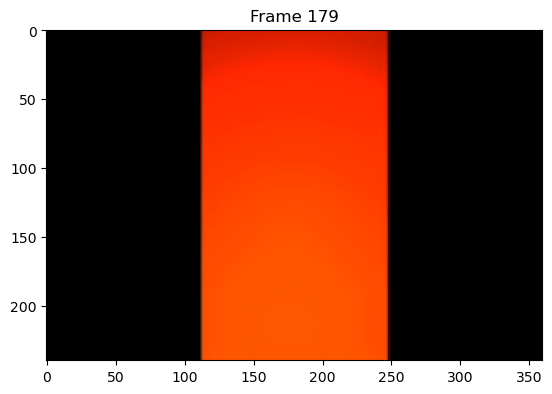

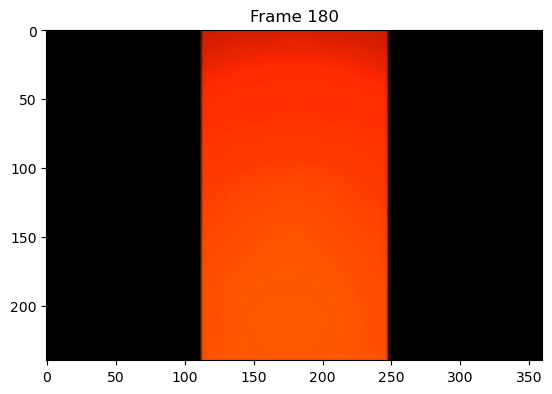

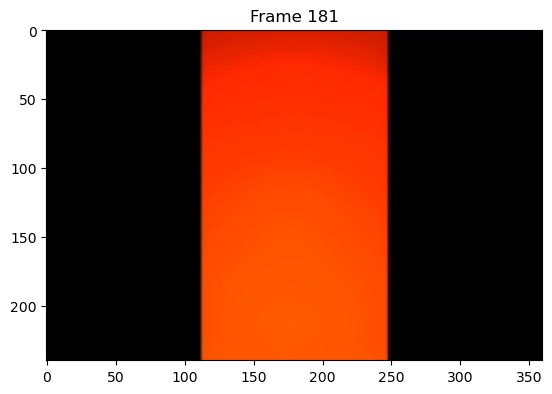

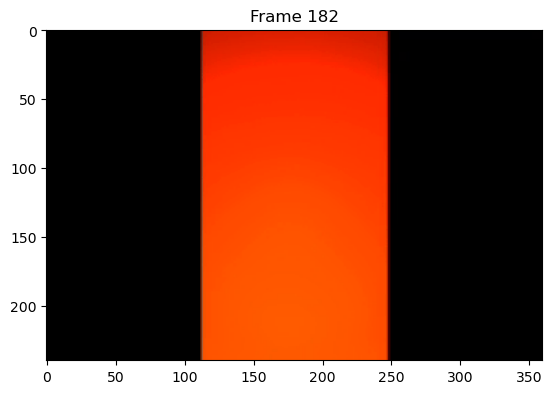

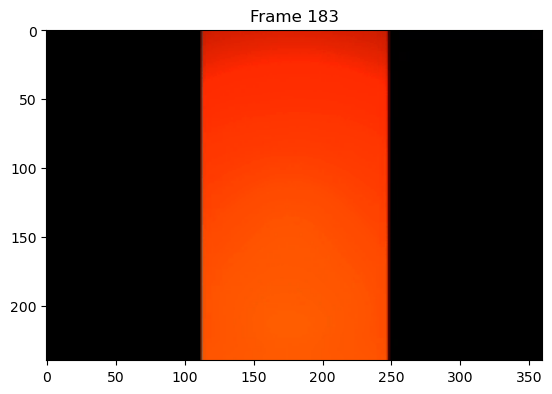

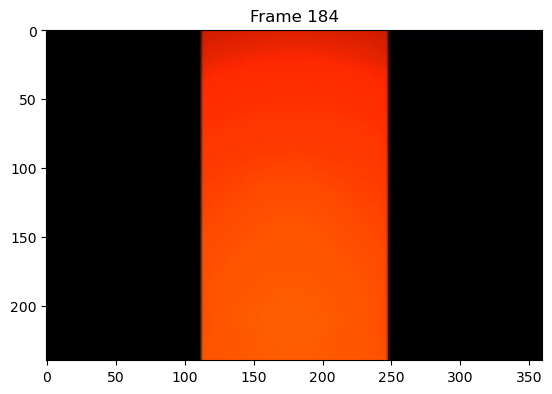

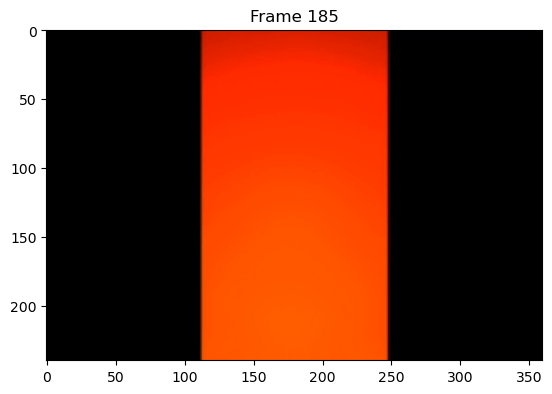

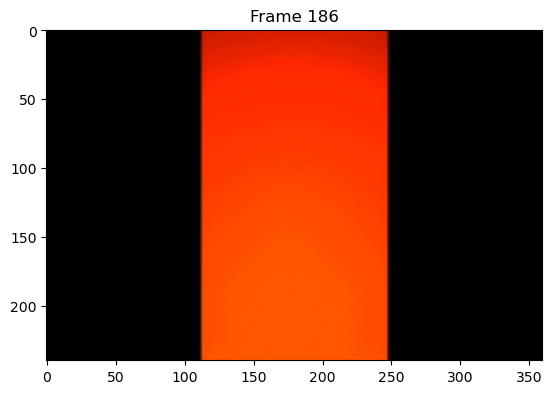

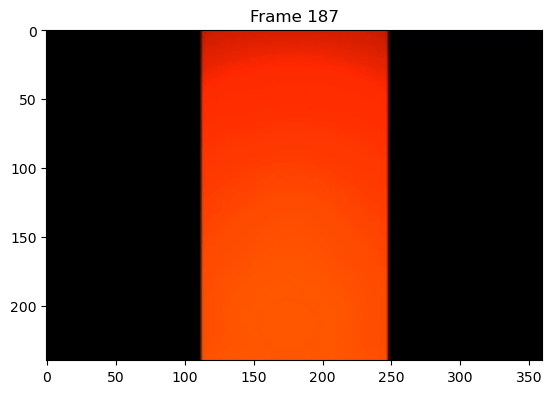

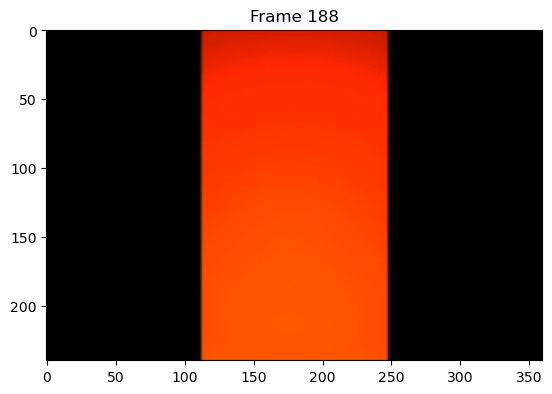

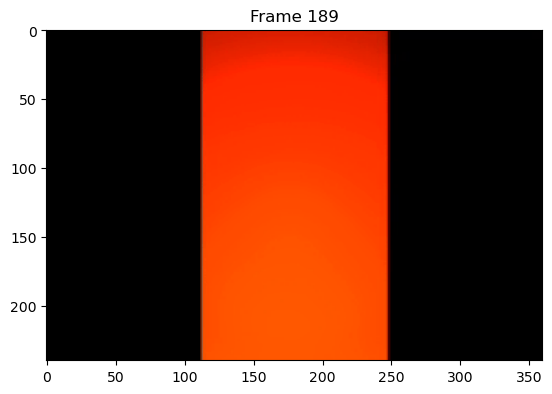

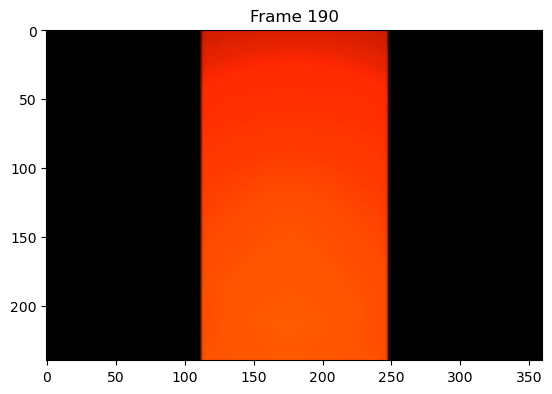

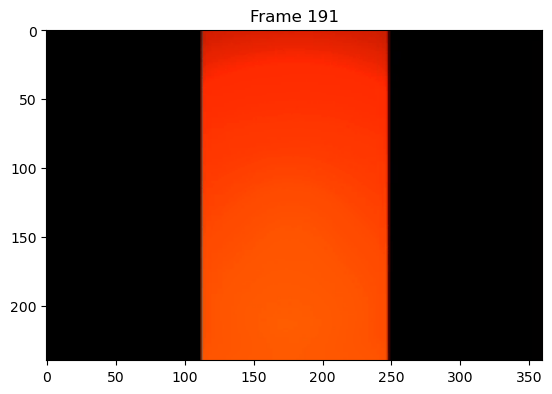

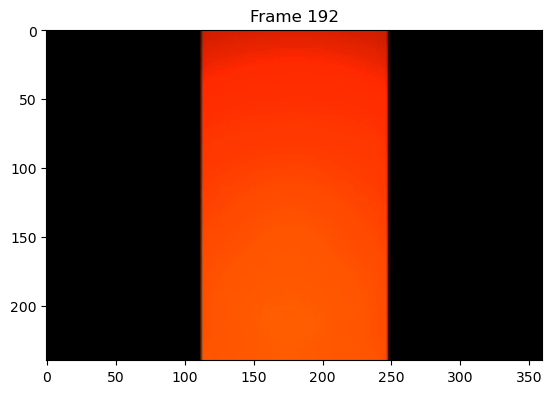

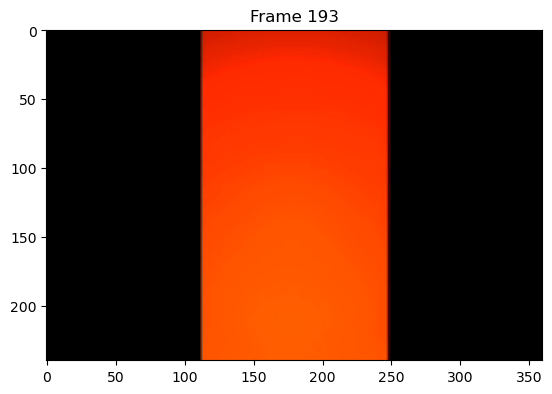

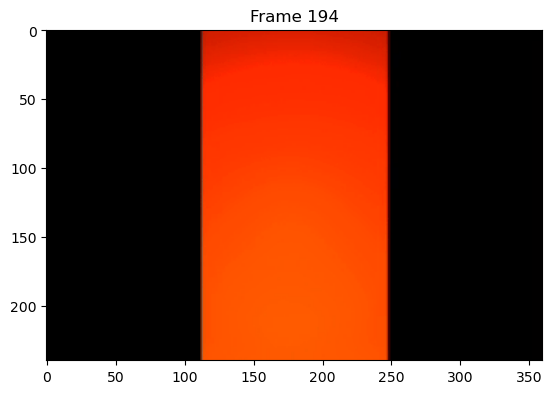

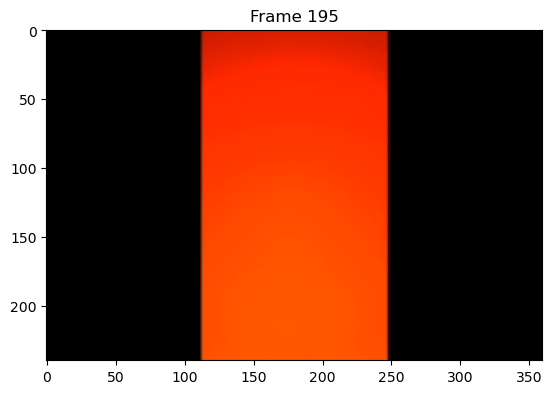

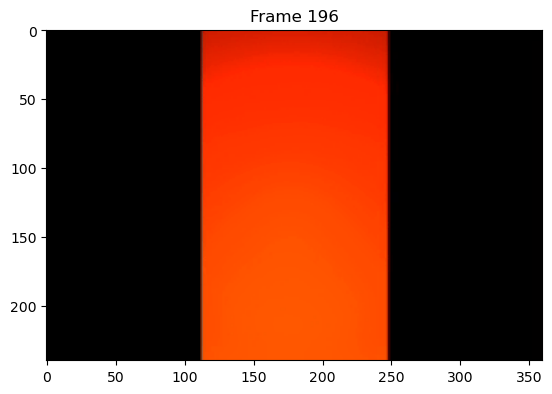

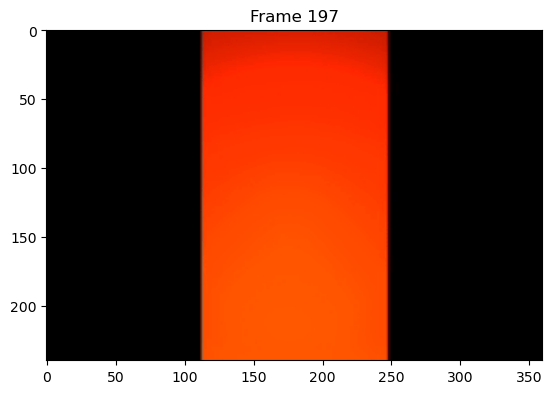

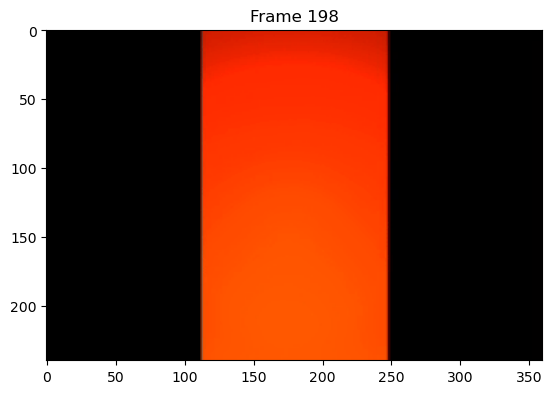

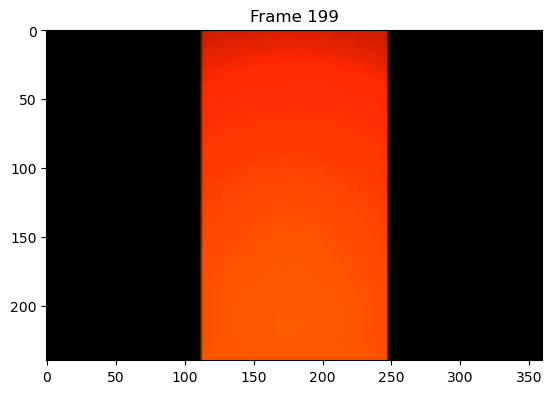

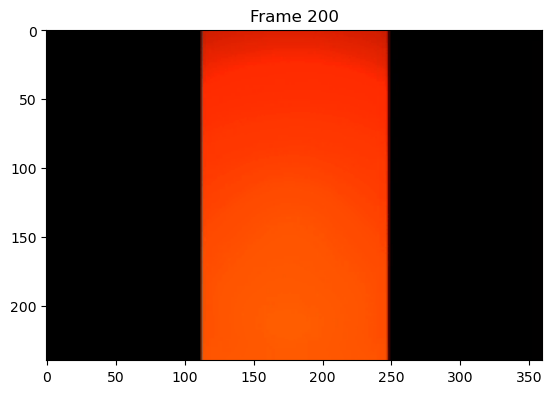

In [19]:
import matplotlib.pyplot as plt

for i, frame in enumerate(frames):
    plt.imshow(frame)
    plt.title(f"Frame {i + 1}")
    plt.show()

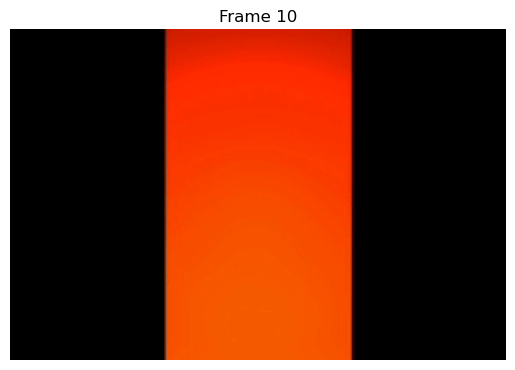

In [23]:
frame_index = 10  # Replace with the desired frame index
selected_frame = frames[frame_index]

plt.imshow(selected_frame)
plt.axis('off')
plt.title(f"Frame {frame_index}")
plt.show()